In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import sys
import bz2
#import _pickle as cPickle
import pickle
import mpld3
#import myutil
from scipy import stats

%matplotlib inline
#TF_GRAPH_SEED=1234
#np.random.seed(2341)
#tf.reset_default_graph()
#tf.set_random_seed(TF_GRAPH_SEED)

In [2]:
%run myutil.py --epochs 100

(60000, 28, 28) (10000, 28, 28) (60000,) (10000,)
(60000, 28, 28, 1) (10000, 28, 28, 1) (60000, 10) (10000, 10)


In [3]:
print ('target label is ' + str(poison_target))
print ('attack label is ' + str(poison_target_change_to))

target label is 1
attack label is 5


In [4]:
run_configs = [
  # clean run
  {'name':'clean','p_poison_train':0.0,'p_poison_test':0.0,'poison_all_labels':False},
  
  # 10% of target label is poisoned
  {'name':'poisoned 10% of training, 10% test of target label',
   'p_poison_train':0.1,'p_poison_test':0.1,'poison_all_labels':False},
  {'name':'poisoned 1% of training, 10% test of target label',
   'p_poison_train':0.01,'p_poison_test':0.1,'poison_all_labels':False},
  {'name':'poisoned 0.15% of training, 10% test of target label',
   'p_poison_train':0.0015,'p_poison_test':0.1,'poison_all_labels':False},
]

In [6]:
ret_logs = {}
for c in run_configs:
  print ('started running for configuration: \n\t{}\n----------'
         .format(c['name']))
  if c['name'] == 'clean':
    ret_logs[c['name']] = \
    kolmogrov_smirnof_clean(total_run=30,conf=c)
  else :
    ret_logs[c['name']] = \
      kolmogrov_smirnof_pois(total_run=30,conf=c)

started running for configuration: 
	clean
----------
run number 0
run number 1
run number 2
run number 3
run number 4
run number 5
run number 6
run number 7
run number 8
run number 9
run number 10
run number 11
run number 12
run number 13
run number 14
run number 15
run number 16
run number 17
run number 18
run number 19
run number 20
run number 21
run number 22
run number 23
run number 24
run number 25
run number 26
run number 27
run number 28
run number 29
started running for configuration: 
	poisoned 10% of training, 10% test of target label
----------
run number 0
6742--->690
1135--->130
run number 1
6742--->695
1135--->118
run number 2
6742--->664
1135--->126
run number 3
6742--->673
1135--->117
run number 4
6742--->703
1135--->122
run number 5
6742--->670
1135--->110
run number 6
6742--->676
1135--->116
run number 7
6742--->734
1135--->103
run number 8
6742--->681
1135--->113
run number 9
6742--->660
1135--->103
run number 10
6742--->669
1135--->104
run number 11
6742--->694
113

In [7]:
write_bz2_pickle(ret_logs,'./madeup_mnist/all_tests_kol_smirnov/ret_logs.pickle.bz2')

In [5]:
ret_logs = read_bz2_ret_pickle('./madeup_mnist/all_tests_kol_smirnov/ret_logs.pickle.bz2')

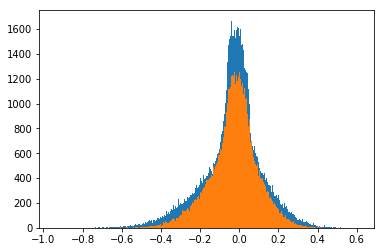

(73728,) (73728,)


In [15]:
it1 = ret_logs['clean'][12]['weights'][18720:92447+1]
it2 = ret_logs['clean'][23]['weights'][18720:92447+1]
plt.hist(it1,bins=300)
#plt.show()
plt.hist(it2,bins=300)
plt.show()
stats.ks_2samp(it1,it2)
print (it1.shape,it2.shape)

In [17]:
vars_range = get_scope_vars_range(def_graph,'REAL')
for r_key,r_val in vars_range.items():
    print ('{} ---> ({},{}) with length {} parameters'
           .format(r_key,r_val[0],r_val[1],r_val[1]-r_val[0]+1))

layers_bound = {'conv1':[('REAL/W0:0',0,287),('REAL/B0:0',355872,355903)],
                'conv2':[('REAL/W1:0',288,18719),('REAL/B1:0',355904,355967)],
                'conv3':[('REAL/W2:0',18720,92447),('REAL/B2:0',355968,356095)],
                'fc1':[('REAL/W3:0',92448,354591),('REAL/B3:0',356096,356223)],
                'fc2':[('REAL/W6:0',354592,355871),('REAL/B4:0',356224,356233)],}

REAL/W0:0 ---> (0,287) with length 288 parameters
REAL/W1:0 ---> (288,18719) with length 18432 parameters
REAL/W2:0 ---> (18720,92447) with length 73728 parameters
REAL/W3:0 ---> (92448,354591) with length 262144 parameters
REAL/W6:0 ---> (354592,355871) with length 1280 parameters
REAL/B0:0 ---> (355872,355903) with length 32 parameters
REAL/B1:0 ---> (355904,355967) with length 64 parameters
REAL/B2:0 ---> (355968,356095) with length 128 parameters
REAL/B3:0 ---> (356096,356223) with length 128 parameters
REAL/B4:0 ---> (356224,356233) with length 10 parameters


Populating the interactive namespace from numpy and matplotlib


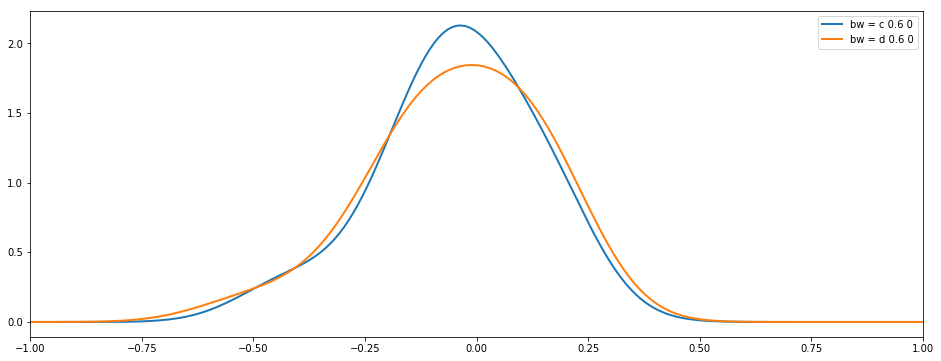

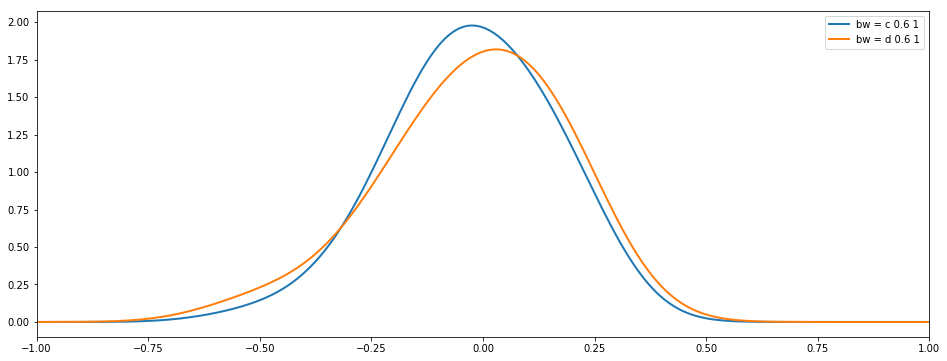

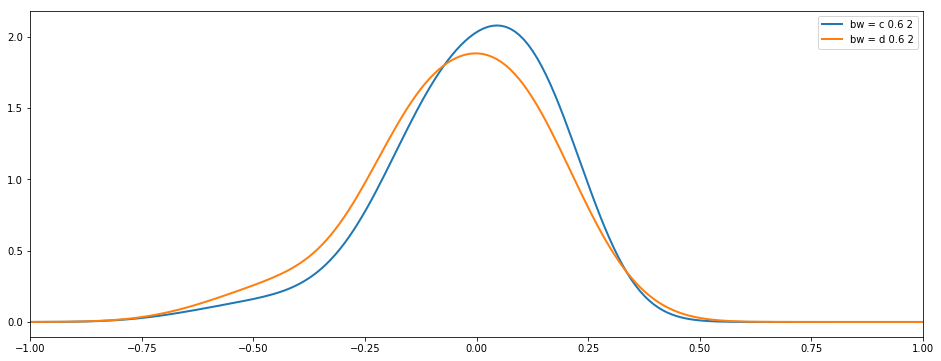

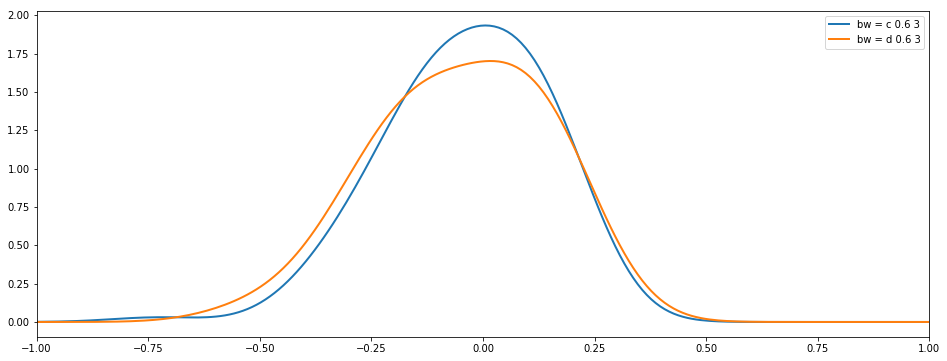

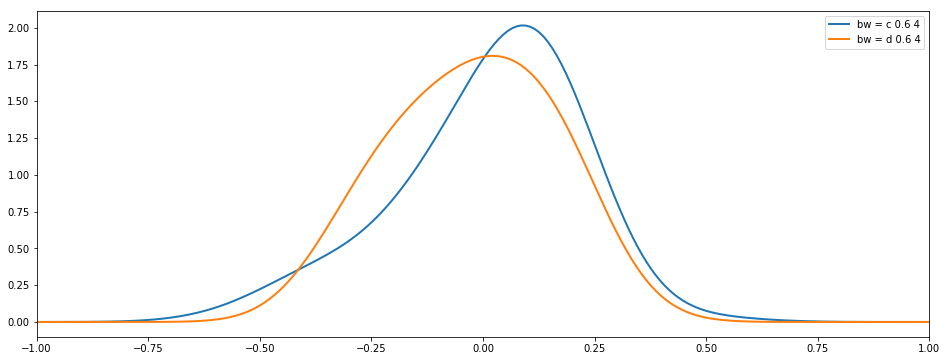

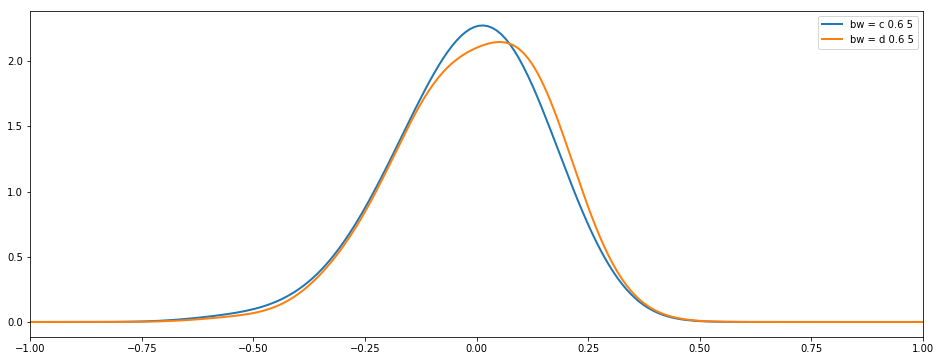

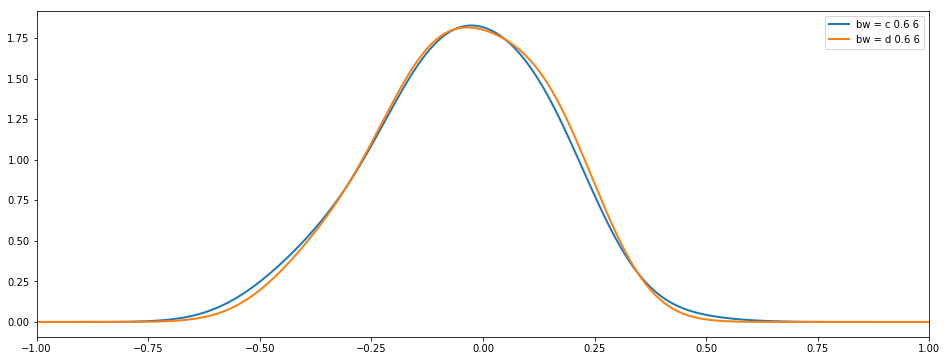

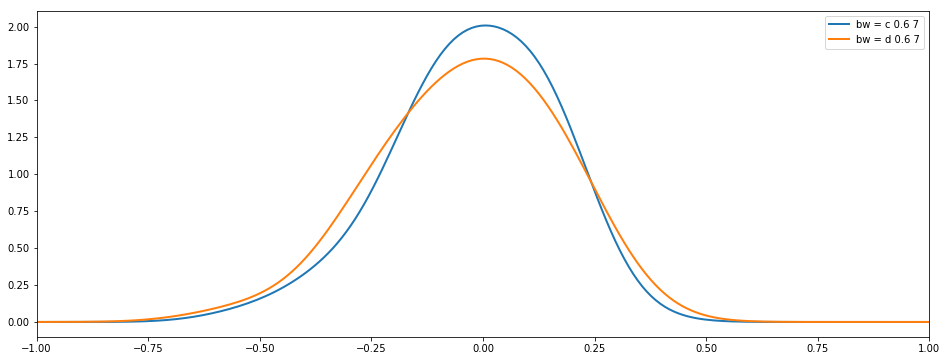

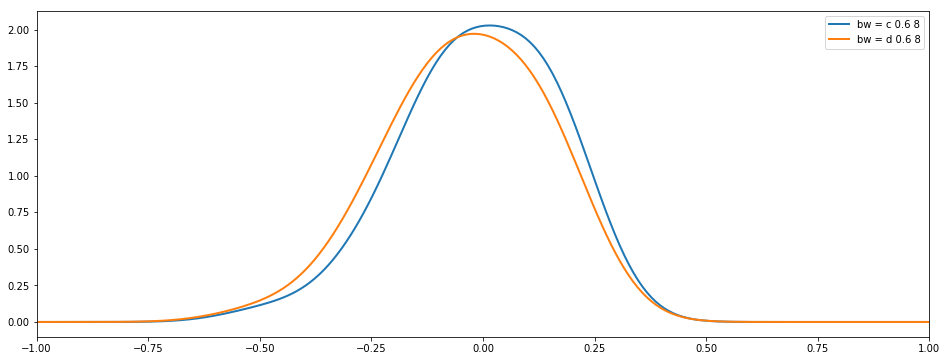

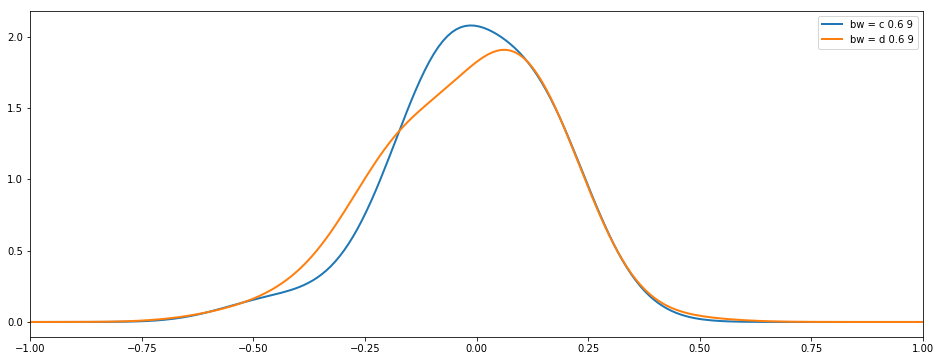

In [87]:
import scipy
plot_initialize(w=16,h=6)
te_item = it1 = ret_logs['clean'][4]['weights'][354592:355871+1].reshape(128,10)
te_d_item = it1 = ret_logs['poisoned 10% of training, 10% test of target label'][14]['weights'][354592:355871+1].reshape(128,10)
#te_d_item = it1 = ret_logs['clean'][29]['weights'][354592:355871+1].reshape(128,10)

# test values for the bw_method option ('None' is the default value)
#bw_values =  [None, 0.1, 0.01]
bw_values =  [0.6]

for i in range(10):
  # generate a list of kde estimators for each bw
  kde_clean = [scipy.stats.gaussian_kde(te_item[:,i],bw_method=bw) for bw in bw_values]
  kde_dirty = [scipy.stats.gaussian_kde(te_d_item[:,i],bw_method=bw) for bw in bw_values]
  plt.xlim(-1,1)
  # plot density estimates
  t_range = np.linspace(-1,1,200)
  # plot (normalized) histogram of the data
  #plt.hist(te_item[:,i], 50, normed=1, facecolor='g', alpha=0.5);
  #plt.hist(te_d_item[:,i], 50, normed=1, facecolor='r', alpha=0.5);
  for j, bw in enumerate(bw_values):
    plt.plot(t_range,kde_clean[j](t_range),lw=2, label='bw = c '+str(bw) + ' ' + str(i))
    plt.plot(t_range,kde_dirty[j](t_range),lw=2, label='bw = d '+str(bw) + ' ' + str(i))

  plt.legend(loc='best')
  plt.show()


In [211]:
def cucconi_dist_boot(x,y,reps=1000):
  boot_vals = np.empty(shape=(0,))
  m = x.shape[0]
  n = y.shape[0]
  x_s = stats.zscore(x,axis=None)
  y_s = stats.zscore(y,axis=None)
  for i in range(reps):
    x_boot = np.random.choice(x_s,size=m)
    y_boot = np.random.choice(y_s,size=n)
    boot_vals = np.hstack((boot_vals,cucconi_test_stat(x_boot,y_boot,m,n)))
  return boot_vals

def cucconi_test_stat(x,y,m,n):
  N = m+n
  combined = np.hstack((x,y))
  S = stats.rankdata(combined)[m:N].astype(int)
  denom = math.sqrt((m*n*(N+1)*(2*N+1)*(8*N+11))/5)
  U = (6 * sum(S**2) - n * (N + 1) * (2 * N + 1))/denom
  V = (6 * sum((N + 1 - S)**2) - n * (N + 1) * (2 * N + 1)) / denom
  rho = (2 * (N**2 - 4)) / ((2 * N + 1) * (8 * N + 11)) - 1
  C = (U**2 + V**2 - 2 * rho * U * V) / (2 * (1 - rho**2))
  return C

def cucconi_test(x,y,fn=None):
  if fn is None:
    raise Exception('fn parameter should be a function that caluculates p-values')
  x = np.asarray(x)
  m = x.shape[0]
  y = np.asarray(y)
  n = y.shape[0]
  C = cucconi_test_stat(x,y,m,n)
  h0dist = fn(x,y)
  pval = len(h0dist[h0dist >= C])/len(h0dist)

  return C,pval

In [181]:
plot_initialize(w=16,h=6)
te_item = it1 = ret_logs['clean'][0]['weights'][354592:355871+1].reshape(128,10)
#te_d_item = it1 = ret_logs['poisoned 10% of training, 10% test of target label'][14]['weights'][354592:355871+1].reshape(128,10)
te_d_item = it1 = ret_logs['clean'][12]['weights'][354592:355871+1].reshape(128,10)

imapct_indices_clean = np.flip(np.argsort(te_item,axis=1),axis=1)
imapct_indices_d = np.flip(np.argsort(te_d_item,axis=1),axis=1)

#print(np.unique(imapct_indices[:,0],axis=0,return_counts=True))
#print(np.unique(imapct_indices_d[:,0],axis=0,return_counts=True))
k_clean = scipy.cluster.vq.kmeans2(te_item,10, iter=1500,thresh=1e-07)
k_d = scipy.cluster.vq.kmeans2(te_d_item,10, iter=1500,thresh=1e-07)
#print(np.unique(k_clean[1],axis=0,return_counts=True))
print('most affected class by this neurons are: {}'.format(imapct_indices_clean[0,:]))
print ('this neuron belonged to cluster {}'.format(
  k_clean[1][0]))
neighbours = np.argwhere(np.array(k_clean[1])==k_clean[1][0]).reshape((-1,))
print ('neighbours of {} are {}'.format(
  k_clean[1][0],neighbours))
print ('top three affected by these neighbours')
print(imapct_indices_clean[neighbours,:])

Populating the interactive namespace from numpy and matplotlib
most affected class by this neurons are: [2 7 1 4 3 0 9 6 8 5]
this neuron belonged to cluster 0
neighbours of 0 are [  0   2   3   8   9  11  14  15  20  21  24  33  37  44  47  52  58  60
  65  66  75  84  87  91  93  94  97 107 117 122 127]
top three affected by these neighbours
[[2 7 1 4 3 0 9 6 8 5]
 [7 9 0 2 8 1 5 6 3 4]
 [2 7 4 9 0 6 1 8 5 3]
 [9 6 2 3 1 0 4 8 7 5]
 [2 6 9 3 7 1 4 8 0 5]
 [8 2 9 7 0 1 4 6 3 5]
 [1 9 0 7 5 6 8 3 2 4]
 [7 9 2 1 4 8 3 5 6 0]
 [2 4 3 7 1 9 8 6 0 5]
 [7 5 9 6 2 3 1 0 8 4]
 [2 6 1 3 9 5 7 4 8 0]
 [1 7 2 5 9 3 6 8 0 4]
 [7 2 6 0 8 1 9 3 5 4]
 [2 9 3 1 5 8 4 0 6 7]
 [4 1 7 5 3 2 0 9 6 8]
 [1 2 9 4 6 7 5 8 0 3]
 [9 4 5 3 2 7 6 1 0 8]
 [6 8 3 1 9 0 7 4 2 5]
 [7 9 4 2 8 6 0 3 5 1]
 [8 2 1 7 6 3 4 0 9 5]
 [3 0 2 1 4 7 8 6 9 5]
 [2 7 8 9 4 6 1 3 0 5]
 [3 2 9 5 1 4 0 7 8 6]
 [7 3 1 2 9 0 4 6 8 5]
 [1 7 3 0 8 5 6 4 2 9]
 [2 7 1 5 8 6 9 4 3 0]
 [1 9 7 6 4 0 3 8 5 2]
 [3 7 1 6 9 0 5 8 4 2]
 [7 6 2 8 

In [506]:
from scipy import stats
import seaborn as sns
from multiprocessing.pool import ThreadPool
n_cores = 7
pool = ThreadPool(processes=n_cores)

p_val_thresh = 0.05

def rank_eliminate(w,remove_odd = False,thresh_size=None):
  if thresh_size is None:
    raise Exception('Threshold size should be given')
  w = w.reshape((1,-1))
  w = np.sort(w)
  start_ind = 1 if remove_odd else 0
  while w.shape[1] > thresh_size:
    rem_ind = np.arange(start_ind,w.shape[1],2,dtype=int)
    if w.shape[1] - len(rem_ind) < thresh_size:
      rem_ind = rem_ind[:w.shape[1]-thresh_size]
    w = np.delete(w,rem_ind,axis=1)
  return w.reshape((-1,))

def unit_vector(vector):
    return vector / np.linalg.norm(vector)

def calculate_angle(a,b,sorted=True):
  if sorted:
    a = np.sort(a)
    b = np.sort(b)
  v1_u = unit_vector(a)
  v2_u = unit_vector(b)
  return np.degrees(np.arccos(np.clip(np.dot(v1_u, v2_u), -1.0, 1.0)))

def two_sample_test_cucconi(s1,s2):
  _, p_val = cucconi_test(s1,s2,fn=cucconi_dist_boot)
  if p_val_thresh < p_val:
    return True
  return False

def two_sample_test(s1,s2):
  _, p_val = stats.ks_2samp(s1,s2)
  if p_val_thresh < p_val:
    return True
  return False

def params_set_ks_test(w1,w2,fn=two_sample_test):
  return fn(w1,w2)

def run_set_ks_test(r1,r2,layers_bound,fn=two_sample_test,rank_elim = False):
  layers_res = {}
  for k,v in layers_bound.items():
    w1 = r1[np.r_[v[0][1]:v[0][2]+1,v[1][1]:v[1][2]+1]]
    w2 = r2[np.r_[v[0][1]:v[0][2]+1,v[1][1]:v[1][2]+1]]
    if rank_elim:
      w1 = rank_eliminate(w1,thresh_size=5000)
      w2 = rank_eliminate(w2,thresh_size=5000)
    layers_res[k] = params_set_ks_test(w1,w2,fn=fn)
  return layers_res

def clean_by_clean_k_test(logs,fn=two_sample_test,rank_elim = False):
  clean_logs = ret_logs['clean']
  clean_compare = {}
  run_len = len(clean_logs)
  for i in range(run_len):
    call_asyncs = []
    #print ('start comparing run {} with others'.format(i))
    for j in range(i+1,run_len):
      #print ('start comparing runs {} , {}'.format(i,j))
      call_asyncs.append(pool.apply_async(run_set_ks_test,(logs['clean'][i]['weights'],
                        logs['clean'][j]['weights'],
                       layers_bound,fn,rank_elim)))
    for j in range(i+1,run_len):
      clean_compare[(i,j)] = call_asyncs[j-i-1].get()
      
  return clean_compare

def clean_clean_degrees(logs,fn=calculate_angle,rank_elim = False):
  clean_logs = ret_logs['clean']
  clean_compare = {}
  run_len = len(clean_logs)
  for i in range(run_len):
    #print ('start comparing run {} with others'.format(i))
    for j in range(i+1,run_len):
      #print ('start comparing runs {} , {}'.format(i,j))
      layers_res = {}
      for k,v in layers_bound.items():
        w1 = logs['clean'][i]['weights'][np.r_[v[0][1]:v[0][2]+1,v[1][1]:v[1][2]+1]]
        w2 = logs['clean'][j]['weights'][np.r_[v[0][1]:v[0][2]+1,v[1][1]:v[1][2]+1]]
        if rank_elim:
          w1 = rank_eliminate(w1,thresh_size=5000)
          w2 = rank_eliminate(w2,thresh_size=5000)
        layers_res[k] = fn(w1,w2)
    clean_compare[(i,j)] = layers_res
  return clean_compare

def poison_clean_degrees(logs,k,fn=calculate_angle,rank_elim = False):
  #all_compare = []
  #print('processing for exper {}'.format(k))
  compare = {}
  run_len = len(logs['clean'])
  other_run_len = len(logs[k])
  for i in range(run_len):
    #print ('start comparing run {} with others'.format(i))
    call_asyncs = []
    for j in range(other_run_len):
      #print ('start comparing runs {} , {}'.format(i,j))
      layers_res = {}
      for l,v in layers_bound.items():
        w1 = logs['clean'][i]['weights'][np.r_[v[0][1]:v[0][2]+1,v[1][1]:v[1][2]+1]]
        w2 = logs[k][j]['weights'][np.r_[v[0][1]:v[0][2]+1,v[1][1]:v[1][2]+1]]
        if rank_elim:
          w1 = rank_eliminate(w1,thresh_size=5000)
          w2 = rank_eliminate(w2,thresh_size=5000)
        layers_res[l] = fn(w1,w2)
    compare[(i,j)] = layers_res
  return compare

def run_dirty_ks_test(logs,k,fn=two_sample_test,rank_elim = False):
  #all_compare = []
  #print('processing for exper {}'.format(k))
  compare = {}
  run_len = len(logs['clean'])
  other_run_len = len(logs[k])
  for i in range(run_len):
    #print ('start comparing run {} with others'.format(i))
    call_asyncs = []
    for j in range(other_run_len):
      #print ('start comparing runs {} , {}'.format(i,j))
      call_asyncs.append(pool.apply_async(run_set_ks_test,(logs['clean'][i]['weights'],
                        logs[k][j]['weights'],
                       layers_bound,fn,rank_elim)))
      #compare[(i,j)] = \
      #  run_set_ks_test(logs['clean'][i]['weights'],
      #                  logs[k][j]['weights'],
      #                 layers_bound,fn=fn)
    for j in range(other_run_len):
      compare[(i,j)] = call_asyncs[j].get()
  return compare

def count_layers_same(compares):
  counts_dict = {}
  for k in layers_bound.keys():
    counts_dict[k] = [0,0]
    for val in compares.values():
      if val[k]:
        counts_dict[k][0] = counts_dict[k][0] + 1
      else :
        counts_dict[k][1] = counts_dict[k][1] + 1
  return counts_dict

def enumerate_layer_vals(compares,ind = 1):
  vals_dict = {}
  for k in layers_bound.keys():
    vals_dict[k] = []
    for val in compares.values():
      vals_dict[k].append(val[k][ind])
  return vals_dict

def plot_initialize(w=16,h=12):
  %pylab inline
  plt.rcParams['figure.figsize'] = [w,h]

def plot_layers(compares,sub_plot_loc,dirty=False):
  index = np.arange(len(layers_bound.keys()))
  counts_dict = count_layers_same(compares)
  bar_width = 0.250
  plt.subplot(2,2,sub_plot_loc)
  plt.ylim(0,110)
  plt.yticks([i for i in range(0,101,5)])
  plt.title('clean vs clean p-val-threshold: {}'.format(p_val_thresh))
  if dirty:
    plt.title('clean vs dirty p-val-threshold: {}'.format(p_val_thresh))
  #plt.xlabel('layers')
  plt.ylabel('percentage')
  for k,v in counts_dict.items():
    tot = sum(v)
    lab_t = None
    lab_f = None
    if k == 'conv1':
      lab_t = 'same dist'
      lab_f = 'not the same'
    plt.bar(k,100.0* v[0]/tot,
              bar_width,color = 'b',label = lab_t)
    plt.bar(k,100.0* v[1]/tot,
              bar_width,bottom = 100.0* v[0]/tot,color = 'r',label=lab_f)
    
  plt.legend(loc=9)
  plt.grid(True)
  plt.subplots_adjust(hspace = 0.4,wspace=0.3)
  #plt.show()

def plot_test_stats(compares_dict):
  sub_loc = 0
  #fig, ax = plt.subplots(5,1)
  for l in layers_bound.keys():
    sub_loc += 1
    plt.subplot(5,1,sub_loc)
    plt.title('distributions of test statistcs for layer ' + l)
    plt.yticks(frange(0,1.01,0.1))
    vs = []
    for k,v in compares_dict.items():
      vs.append(np.array(v[l]))
    plt.hist(vs,label=compares_dict.keys(), density=True,bins=80,cumulative=True,log=False
            #,histtype='bar'
            )
    #if l in ['conv2','conv3','fc1']:
    #  plt.xlim(0.0,0.1)
    #  plt.hist(vs,label=compares_dict.keys(), density=True,bins=100,cumulative=True)
    #else:
    #  plt.hist(vs,label=compares_dict.keys(), density=True,bins=100,cumulative=True)
    
      
    plt.legend(loc=0)
    plt.grid(True)
    plt.subplots_adjust(hspace = 0.4,wspace=0.3)
    #savefig('test-stat-cdf-bar.png')

def plot_test_pv(compares_dict):
  sub_loc = 0
  #fig, ax = plt.subplots(5,1)
  for l in layers_bound.keys():
    sub_loc += 1
    plt.subplot(5,1,sub_loc)
    plt.title('distributions of p-value for layer ' + l)
    plt.yticks(frange(0,1.01,0.1))
    vs = []
    
    for k,v in compares_dict.items():
    #  if l in ['conv2','conv3','fc1']:
    #    arr_v = np.array(v[l])
    #    arr_v = arr_v[arr_v < 0.001]
    #    vs.append(arr_v)
    #  else:
    #    vs.append(np.array(v[l]))
    #if l in ['conv2','conv3','fc1']:
    #  plt.hist(vs,label=compares_dict.keys(), density=True,bins=3000,cumulative=True)
    #else:
    #  plt.hist(vs,label=compares_dict.keys(), density=True,bins=600,cumulative=True)
      vv = np.array(v[l])
      #min_nonzero = np.min(vv[np.nonzero(vv)])
      #vv[vv == 0] = min_nonzero
      #vs.append(np.log10(vv))
      vs.append(vv)
    if l in ['conv2','conv3','fc1']:
      #plt.xlim(0.0,0.02)
      plt.hist(vs,label=compares_dict.keys(), density=True,bins=10000,cumulative=True,log=False
            #,histtype='bar'
            )
    else:
      plt.hist(vs,label=compares_dict.keys(), density=True,bins=80,cumulative=True,log=False
            #,histtype='bar'
            )
      
    plt.legend(loc=0)
    plt.grid(True)
    plt.subplots_adjust(hspace = 0.4,wspace=0.3)
    #savefig('p-v-cdf-bar-real-p-range-0.002.png')

plot_initialize()  

Populating the interactive namespace from numpy and matplotlib


## Calculating Angle Between Vectors

In [398]:
degrees_clean_compares = clean_clean_degrees(ret_logs,fn=calculate_angle)
clean_v_l_list = {}
for l in layers_bound.keys():
  clean_v_l_list[l] = []
  for k,v in  degrees_clean_compares.items():
    clean_v_l_list[l].append(v[l]) 

In [399]:
degrees_clean_p_10_compares = poison_clean_degrees(ret_logs,'poisoned 10% of training, 10% test of target label',
                               fn=calculate_angle)
p_10_v_l_list = {}
for l in layers_bound.keys():
  p_10_v_l_list[l] = []
  for k,v in  degrees_clean_p_10_compares.items():
    p_10_v_l_list[l].append(v[l]) 

In [400]:
degrees_clean_p_1_compares = poison_clean_degrees(ret_logs,'poisoned 1% of training, 10% test of target label',
                               fn=calculate_angle)
p_1_v_l_list = {}
for l in layers_bound.keys():
  p_1_v_l_list[l] = []
  for k,v in  degrees_clean_p_1_compares.items():
    p_1_v_l_list[l].append(v[l]) 

In [401]:
degrees_clean_p_0_15_compares = poison_clean_degrees(ret_logs,'poisoned 0.15% of training, 10% test of target label',
                               fn=calculate_angle)
p_0_15_v_l_list = {}
for l in layers_bound.keys():
  p_0_15_v_l_list[l] = []
  for k,v in  degrees_clean_p_0_15_compares.items():
    p_0_15_v_l_list[l].append(v[l]) 

### Vectors are not sorted to calculate the angle

Populating the interactive namespace from numpy and matplotlib


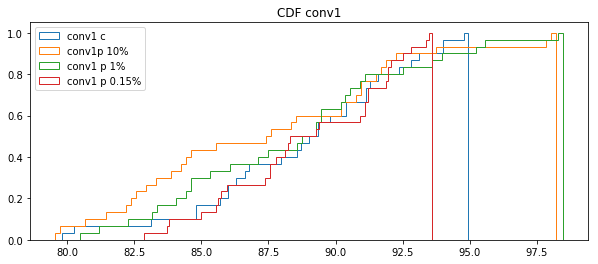

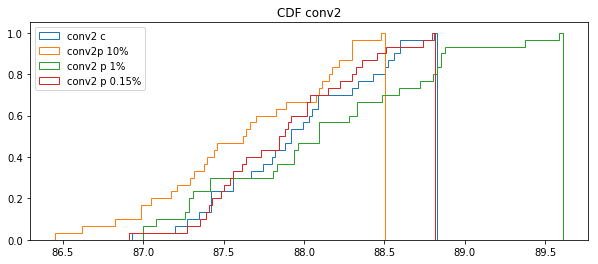

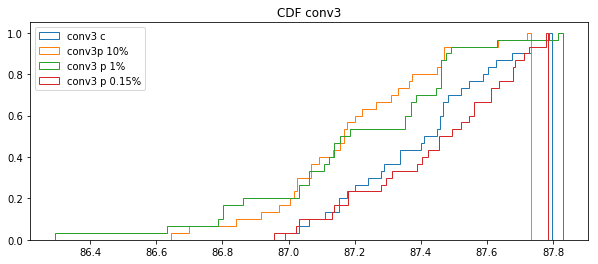

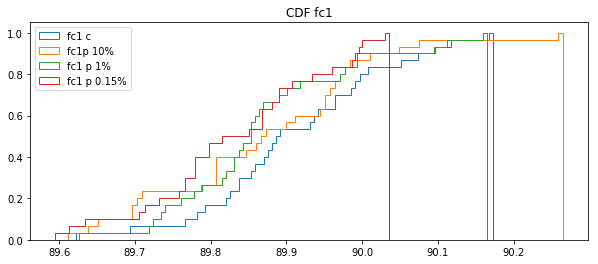

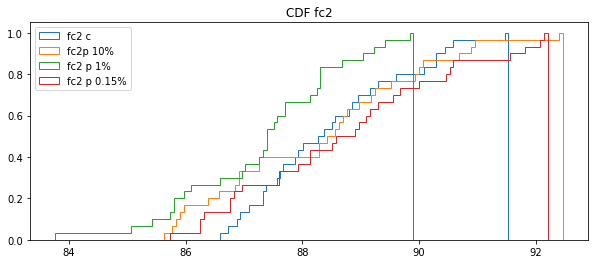

In [379]:
plot_initialize(w=10,h=4)
for l in layers_bound.keys():
  plt.clf()
  plt.title('CDF '+ l)
  plt.hist(clean_v_l_list[l],label=l+str(' c'),bins=100,cumulative=True,density=True,histtype='step')
  plt.hist(p_10_v_l_list[l],label=l+str('p 10%'),bins=100,cumulative=True,density=True,histtype='step')
  plt.hist(p_1_v_l_list[l],label=l+str(' p 1%'),bins=100,cumulative=True,density=True,histtype='step')
  plt.hist(p_0_15_v_l_list[l],label=l+str(' p 0.15%'),bins=100,cumulative=True,density=True,histtype='step')
  plt.legend(loc=2)
  plt.show()

### Vectors are sorted to calculate the angle

Populating the interactive namespace from numpy and matplotlib


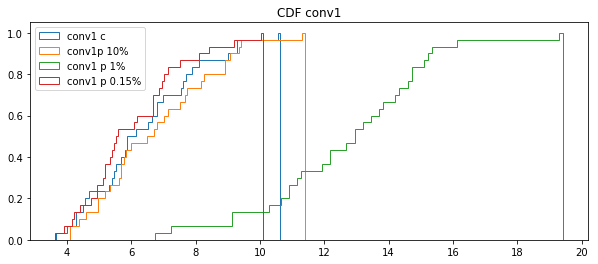

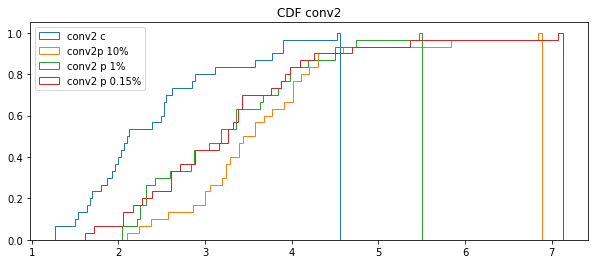

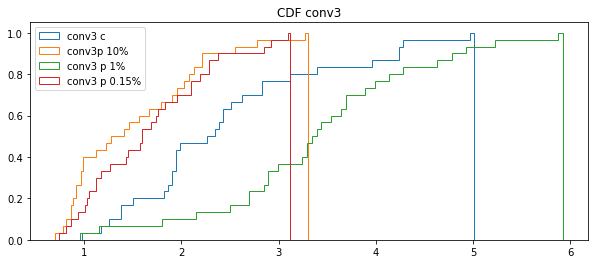

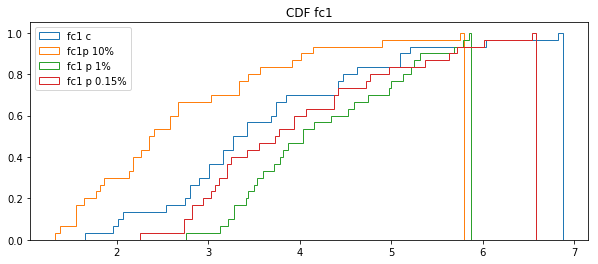

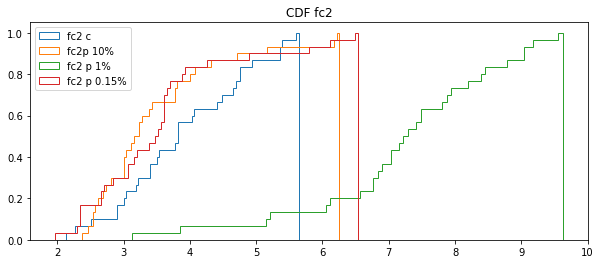

In [402]:
plot_initialize(w=10,h=4)
for l in layers_bound.keys():
  plt.clf()
  plt.title('CDF '+ l)
  plt.hist(clean_v_l_list[l],label=l+str(' c'),bins=100,cumulative=True,density=True,histtype='step')
  plt.hist(p_10_v_l_list[l],label=l+str('p 10%'),bins=100,cumulative=True,density=True,histtype='step')
  plt.hist(p_1_v_l_list[l],label=l+str(' p 1%'),bins=100,cumulative=True,density=True,histtype='step')
  plt.hist(p_0_15_v_l_list[l],label=l+str(' p 0.15%'),bins=100,cumulative=True,density=True,histtype='step')
  plt.legend(loc=2)
  plt.show()

### Vectors are not sorted to calculate the angle

Populating the interactive namespace from numpy and matplotlib


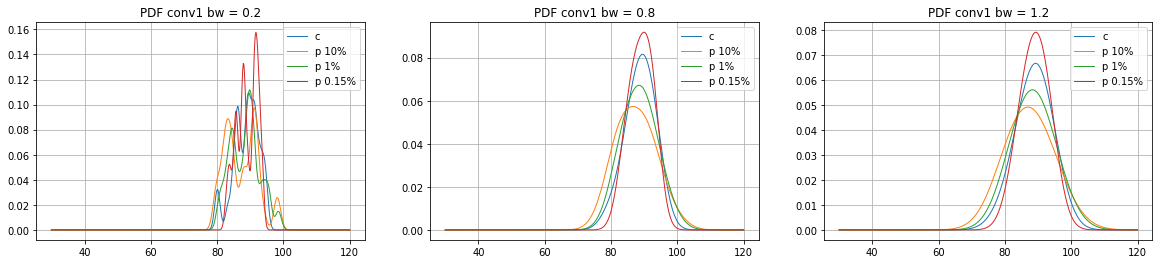

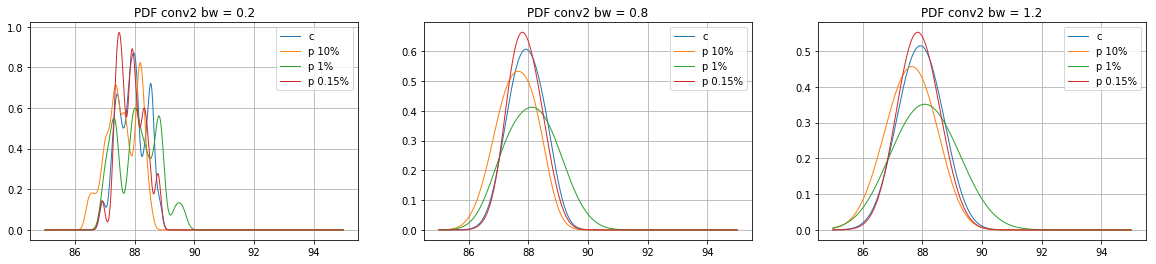

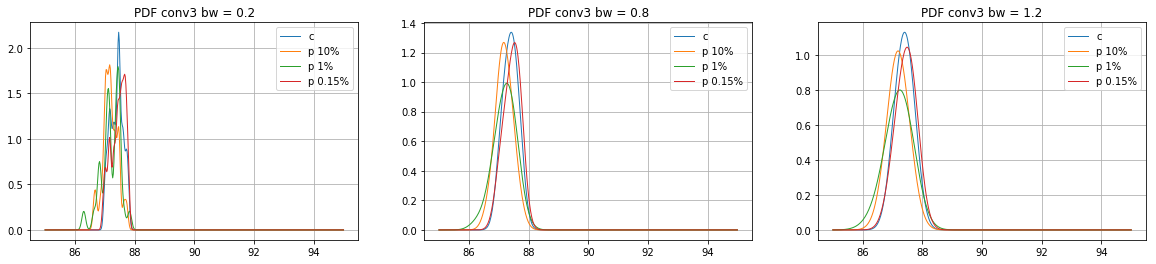

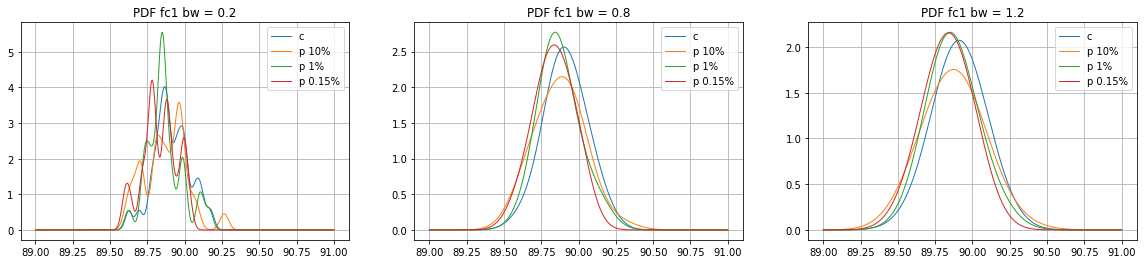

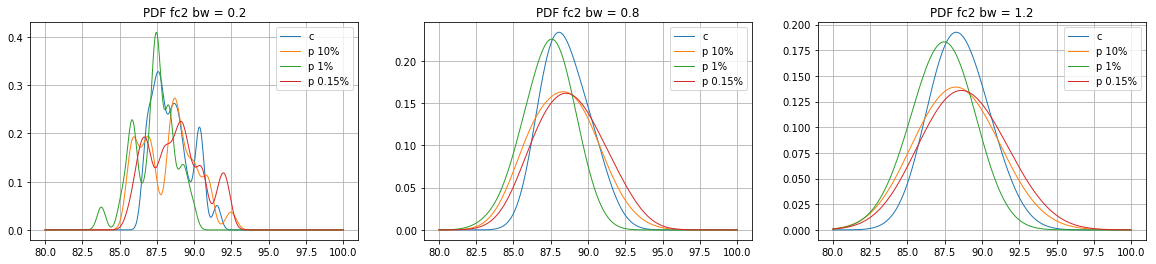

In [396]:
plot_initialize(w=20,h=4)
bw_values =  [0.2,0.8,1.2]
w_range = [(30,120),(85,95),(85,95),(89,91),(80,100)]
#plt.clf()  
for index,l in enumerate(layers_bound.keys()):
  #plt.xlim(0,25)
  kde_c_c = [scipy.stats.gaussian_kde(clean_v_l_list[l],bw_method=bw) for bw in bw_values]
  kde_c_p_10 = [scipy.stats.gaussian_kde(p_10_v_l_list[l],bw_method=bw) for bw in bw_values]
  kde_c_p_1 = [scipy.stats.gaussian_kde(p_1_v_l_list[l],bw_method=bw) for bw in bw_values]
  kde_c_p_0_15 = [scipy.stats.gaussian_kde(p_0_15_v_l_list[l],bw_method=bw) for bw in bw_values]
  for j, bw in enumerate(bw_values):
    plt.subplot(1,len(bw_values),j+1)
    plt.title('PDF '+ l + ' bw = ' + str(bw))
    t_range = np.linspace(w_range[index][0],w_range[index][1],500)
    plt.plot(t_range,kde_c_c[j](t_range),lw=1, label='c')
    
    t_range = np.linspace(w_range[index][0],w_range[index][1],500)
    plt.plot(t_range,kde_c_p_10[j](t_range),lw=1, label='p 10%')
    
    t_range = np.linspace(w_range[index][0],w_range[index][1],500)
    plt.plot(t_range,kde_c_p_1[j](t_range),lw=1, label='p 1%')
    
    t_range = np.linspace(w_range[index][0],w_range[index][1],500)
    plt.plot(t_range,kde_c_p_0_15[j](t_range),lw=1, label='p 0.15%')
    
    plt.legend(loc=0)
    plt.grid()
  plt.show()

### Vectors are sorted to calculate the angle

Populating the interactive namespace from numpy and matplotlib


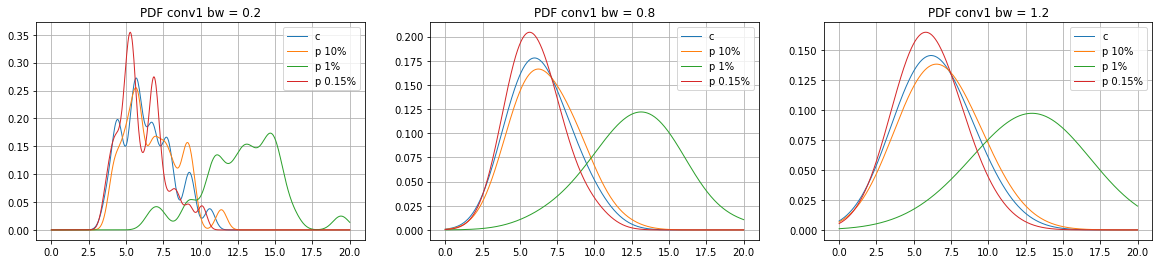

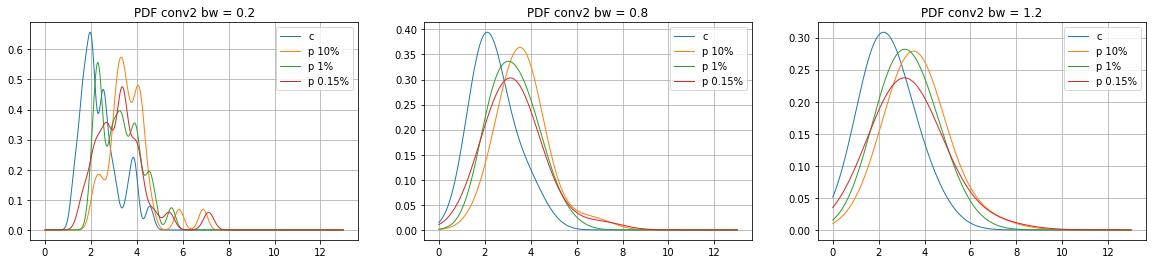

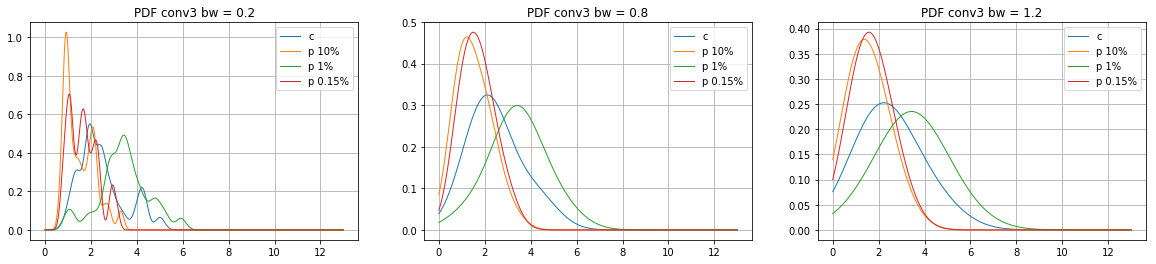

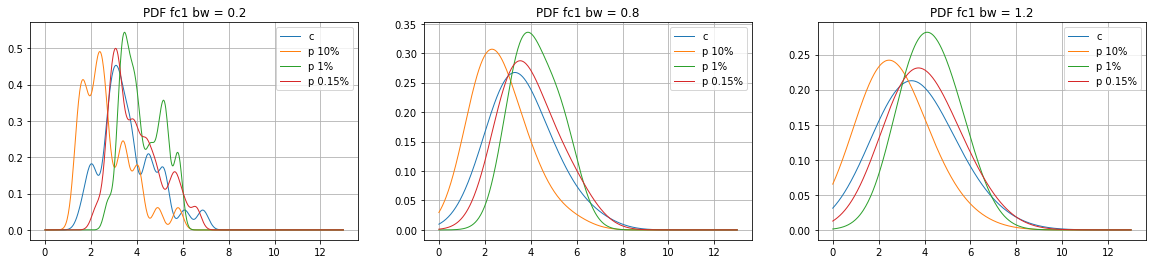

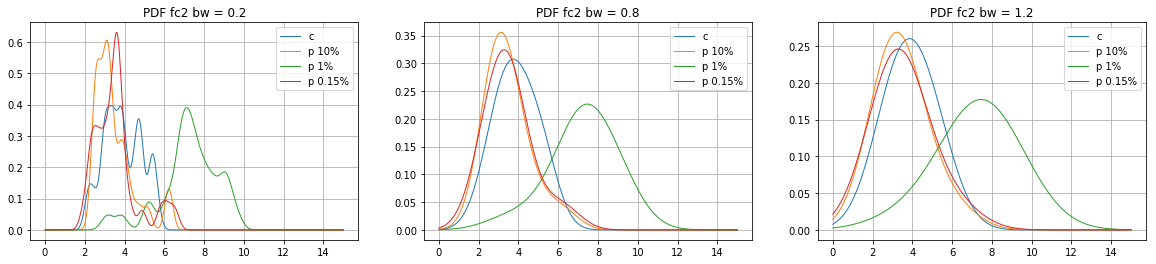

In [405]:
plot_initialize(w=20,h=4)
bw_values =  [0.2,0.8,1.2]
w_range = [(0,20),(0,13),(0,13),(0,13),(0,15)]
#plt.clf()  
for index,l in enumerate(layers_bound.keys()):
  #plt.xlim(0,25)
  kde_c_c = [scipy.stats.gaussian_kde(clean_v_l_list[l],bw_method=bw) for bw in bw_values]
  kde_c_p_10 = [scipy.stats.gaussian_kde(p_10_v_l_list[l],bw_method=bw) for bw in bw_values]
  kde_c_p_1 = [scipy.stats.gaussian_kde(p_1_v_l_list[l],bw_method=bw) for bw in bw_values]
  kde_c_p_0_15 = [scipy.stats.gaussian_kde(p_0_15_v_l_list[l],bw_method=bw) for bw in bw_values]
  for j, bw in enumerate(bw_values):
    plt.subplot(1,len(bw_values),j+1)
    plt.title('PDF '+ l + ' bw = ' + str(bw))
    t_range = np.linspace(w_range[index][0],w_range[index][1],500)
    plt.plot(t_range,kde_c_c[j](t_range),lw=1, label='c')
    
    t_range = np.linspace(w_range[index][0],w_range[index][1],500)
    plt.plot(t_range,kde_c_p_10[j](t_range),lw=1, label='p 10%')
    
    t_range = np.linspace(w_range[index][0],w_range[index][1],500)
    plt.plot(t_range,kde_c_p_1[j](t_range),lw=1, label='p 1%')
    
    t_range = np.linspace(w_range[index][0],w_range[index][1],500)
    plt.plot(t_range,kde_c_p_0_15[j](t_range),lw=1, label='p 0.15%')
    
    plt.legend(loc=0)
    plt.grid()
  plt.show()

   ## Cucconi Test

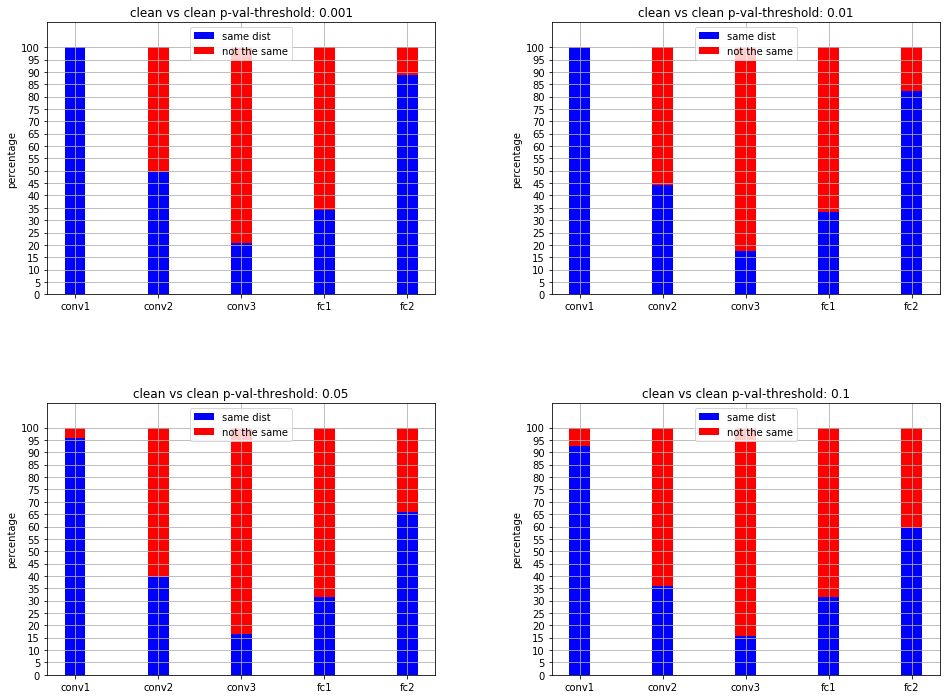

In [214]:
[0.001,0.01,0.05,0.10]
for i,v in enumerate([0.001,0.01,0.05,0.10],1):
  p_val_thresh = v
  clean_compares = clean_by_clean_k_test(ret_logs,fn=two_sample_test_cucconi)
  plot_layers(clean_compares,i,dirty=False)
plt.show()

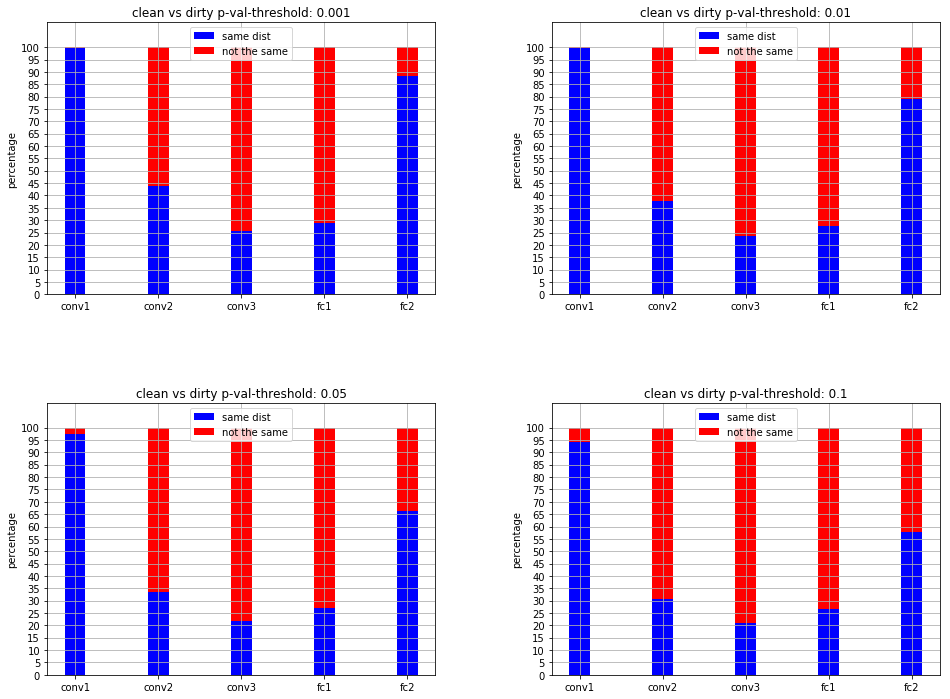

In [223]:
#[0.001,0.01,0.05,0.10]
for i,v in enumerate([0.001,0.01,0.05,0.10],1):
  p_val_thresh = v
  compares = run_dirty_ks_test(ret_logs,'poisoned 10% of training, 10% test of target label',
                               fn=two_sample_test_cucconi)
  plot_layers(compares,i,dirty=True)
plt.show()

## Kolmogrov Smirnov

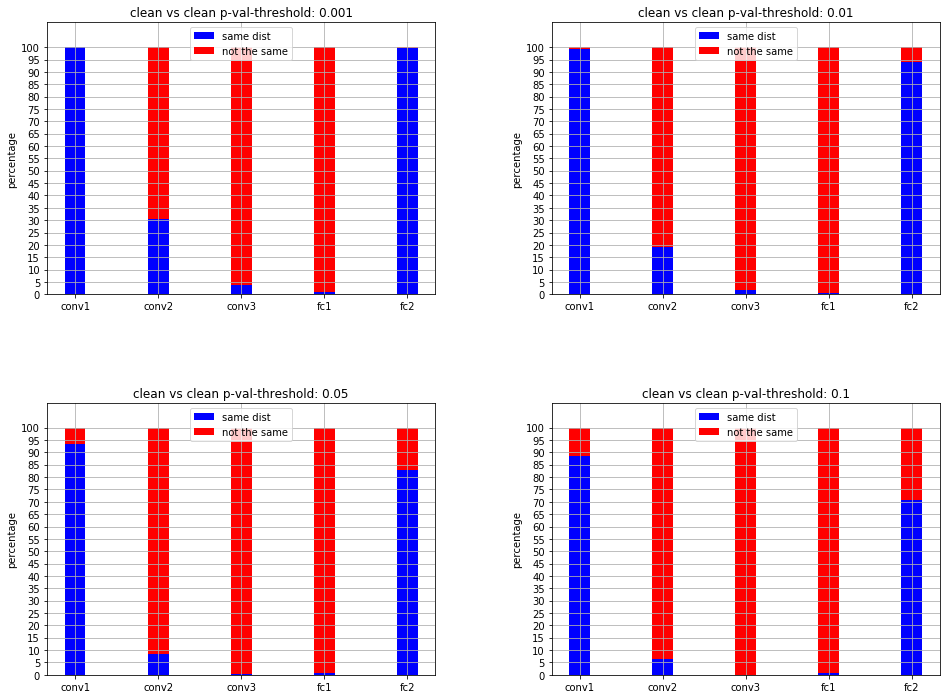

In [166]:
for i,v in enumerate([0.001,0.01,0.05,0.10],1):
  p_val_thresh = v
  clean_compares = clean_by_clean_k_test(ret_logs)
  plot_layers(clean_compares,i,dirty=False)
plt.show()

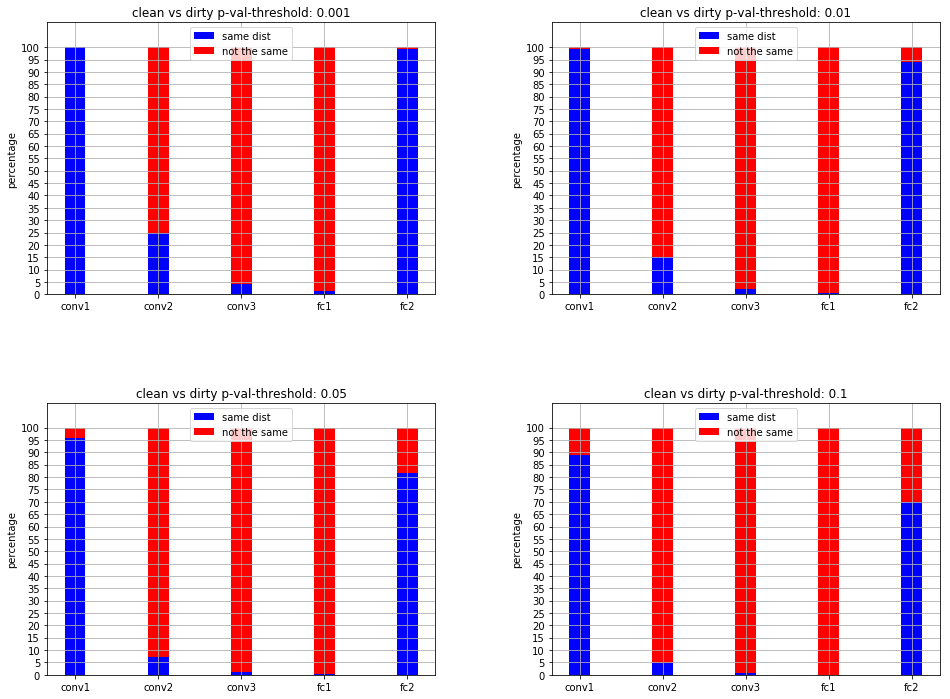

In [167]:
for i,v in enumerate([0.001,0.01,0.05,0.10],1):
  p_val_thresh = v
  compares = run_dirty_ks_test(ret_logs,'poisoned 10% of training, 10% test of target label')
  plot_layers(compares,i,dirty=True)
plt.show()

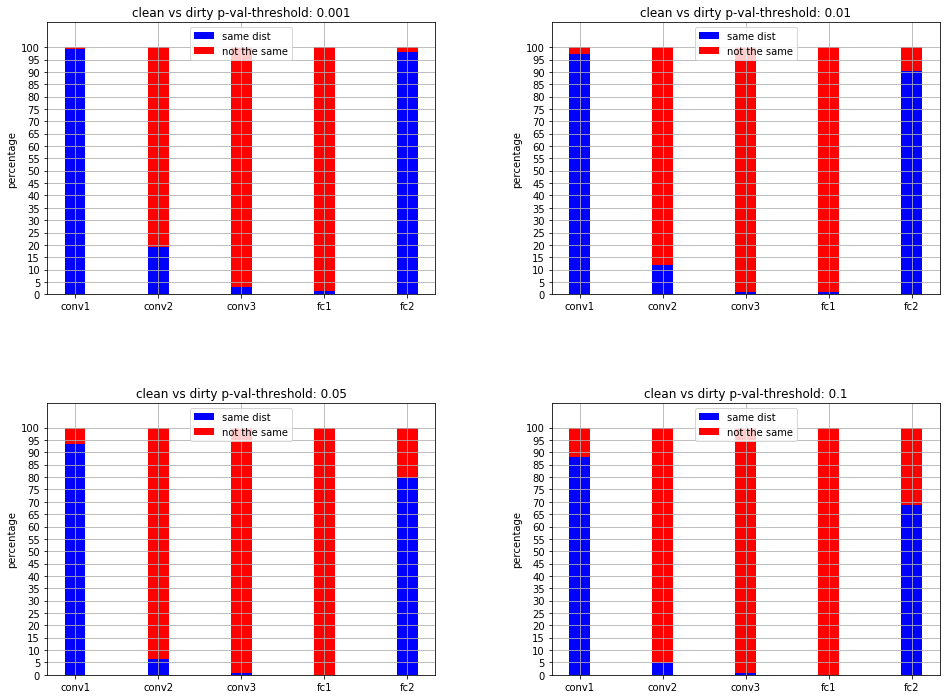

In [168]:
for i,v in enumerate([0.001,0.01,0.05,0.10],1):
  p_val_thresh = v
  compares = run_dirty_ks_test(ret_logs,'poisoned 1% of training, 10% test of target label')
  plot_layers(compares,i,dirty=True)
plt.show()

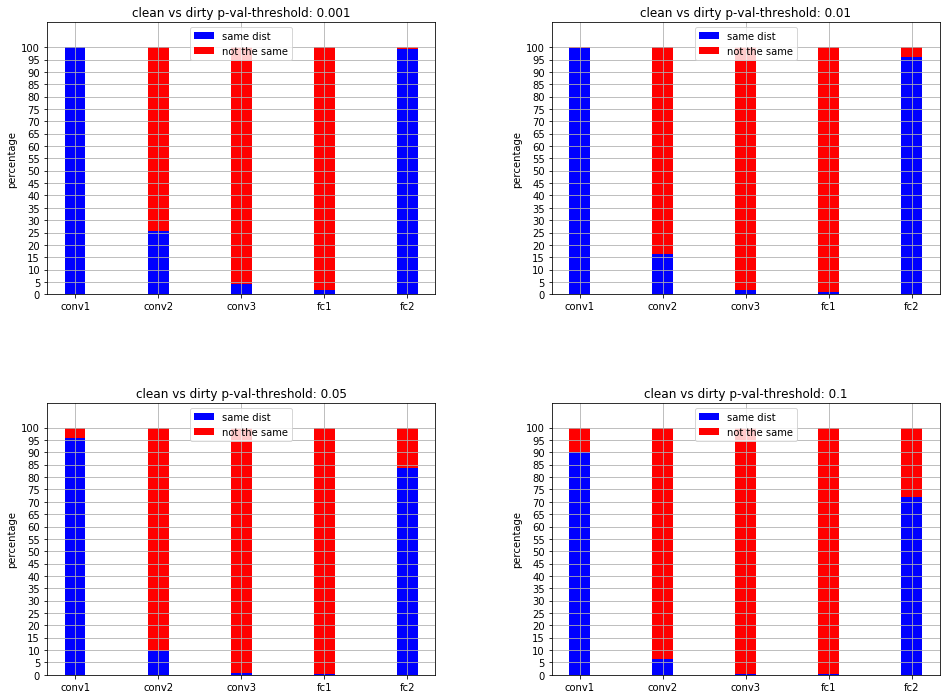

In [169]:
for i,v in enumerate([0.001,0.01,0.05,0.10],1):
  p_val_thresh = v
  compares = run_dirty_ks_test(ret_logs,'poisoned 0.15% of training, 10% test of target label')
  plot_layers(compares,i,dirty=True)
plt.show()

In [10]:
clean_compares = clean_by_clean_k_test(ret_logs,fn=stats.ks_2samp)

In [11]:
clean_dirt_p_10 = run_dirty_ks_test(
  ret_logs,'poisoned 10% of training, 10% test of target label',fn=stats.ks_2samp)
clean_dirt_p_1 = run_dirty_ks_test(
  ret_logs,'poisoned 1% of training, 10% test of target label',fn=stats.ks_2samp)
clean_dirt_p_0_15 = run_dirty_ks_test(
  ret_logs,'poisoned 0.15% of training, 10% test of target label',fn=stats.ks_2samp)

In [12]:
clean_vs_clean = enumerate_layer_vals(clean_compares,ind=0)
clean_vs_d_10 = enumerate_layer_vals(clean_dirt_p_10,ind=0)
clean_vs_d_1 = enumerate_layer_vals(clean_dirt_p_1,ind=0)
clean_vs_d_0_15 = enumerate_layer_vals(clean_dirt_p_0_15,ind=0)
all_compares_test_stat = {'clean vs clean':clean_vs_clean,
                          'clean vs poison 10%':clean_vs_d_10,
                          'clean vs poison 1%':clean_vs_d_1,
                          'clean vs poison 0.15%':clean_vs_d_0_15,
                         }

Populating the interactive namespace from numpy and matplotlib


/usr/lib/python3.7/site-packages/ipykernel_launcher.py:110: MatplotlibDeprecationWarning: numpy.arange


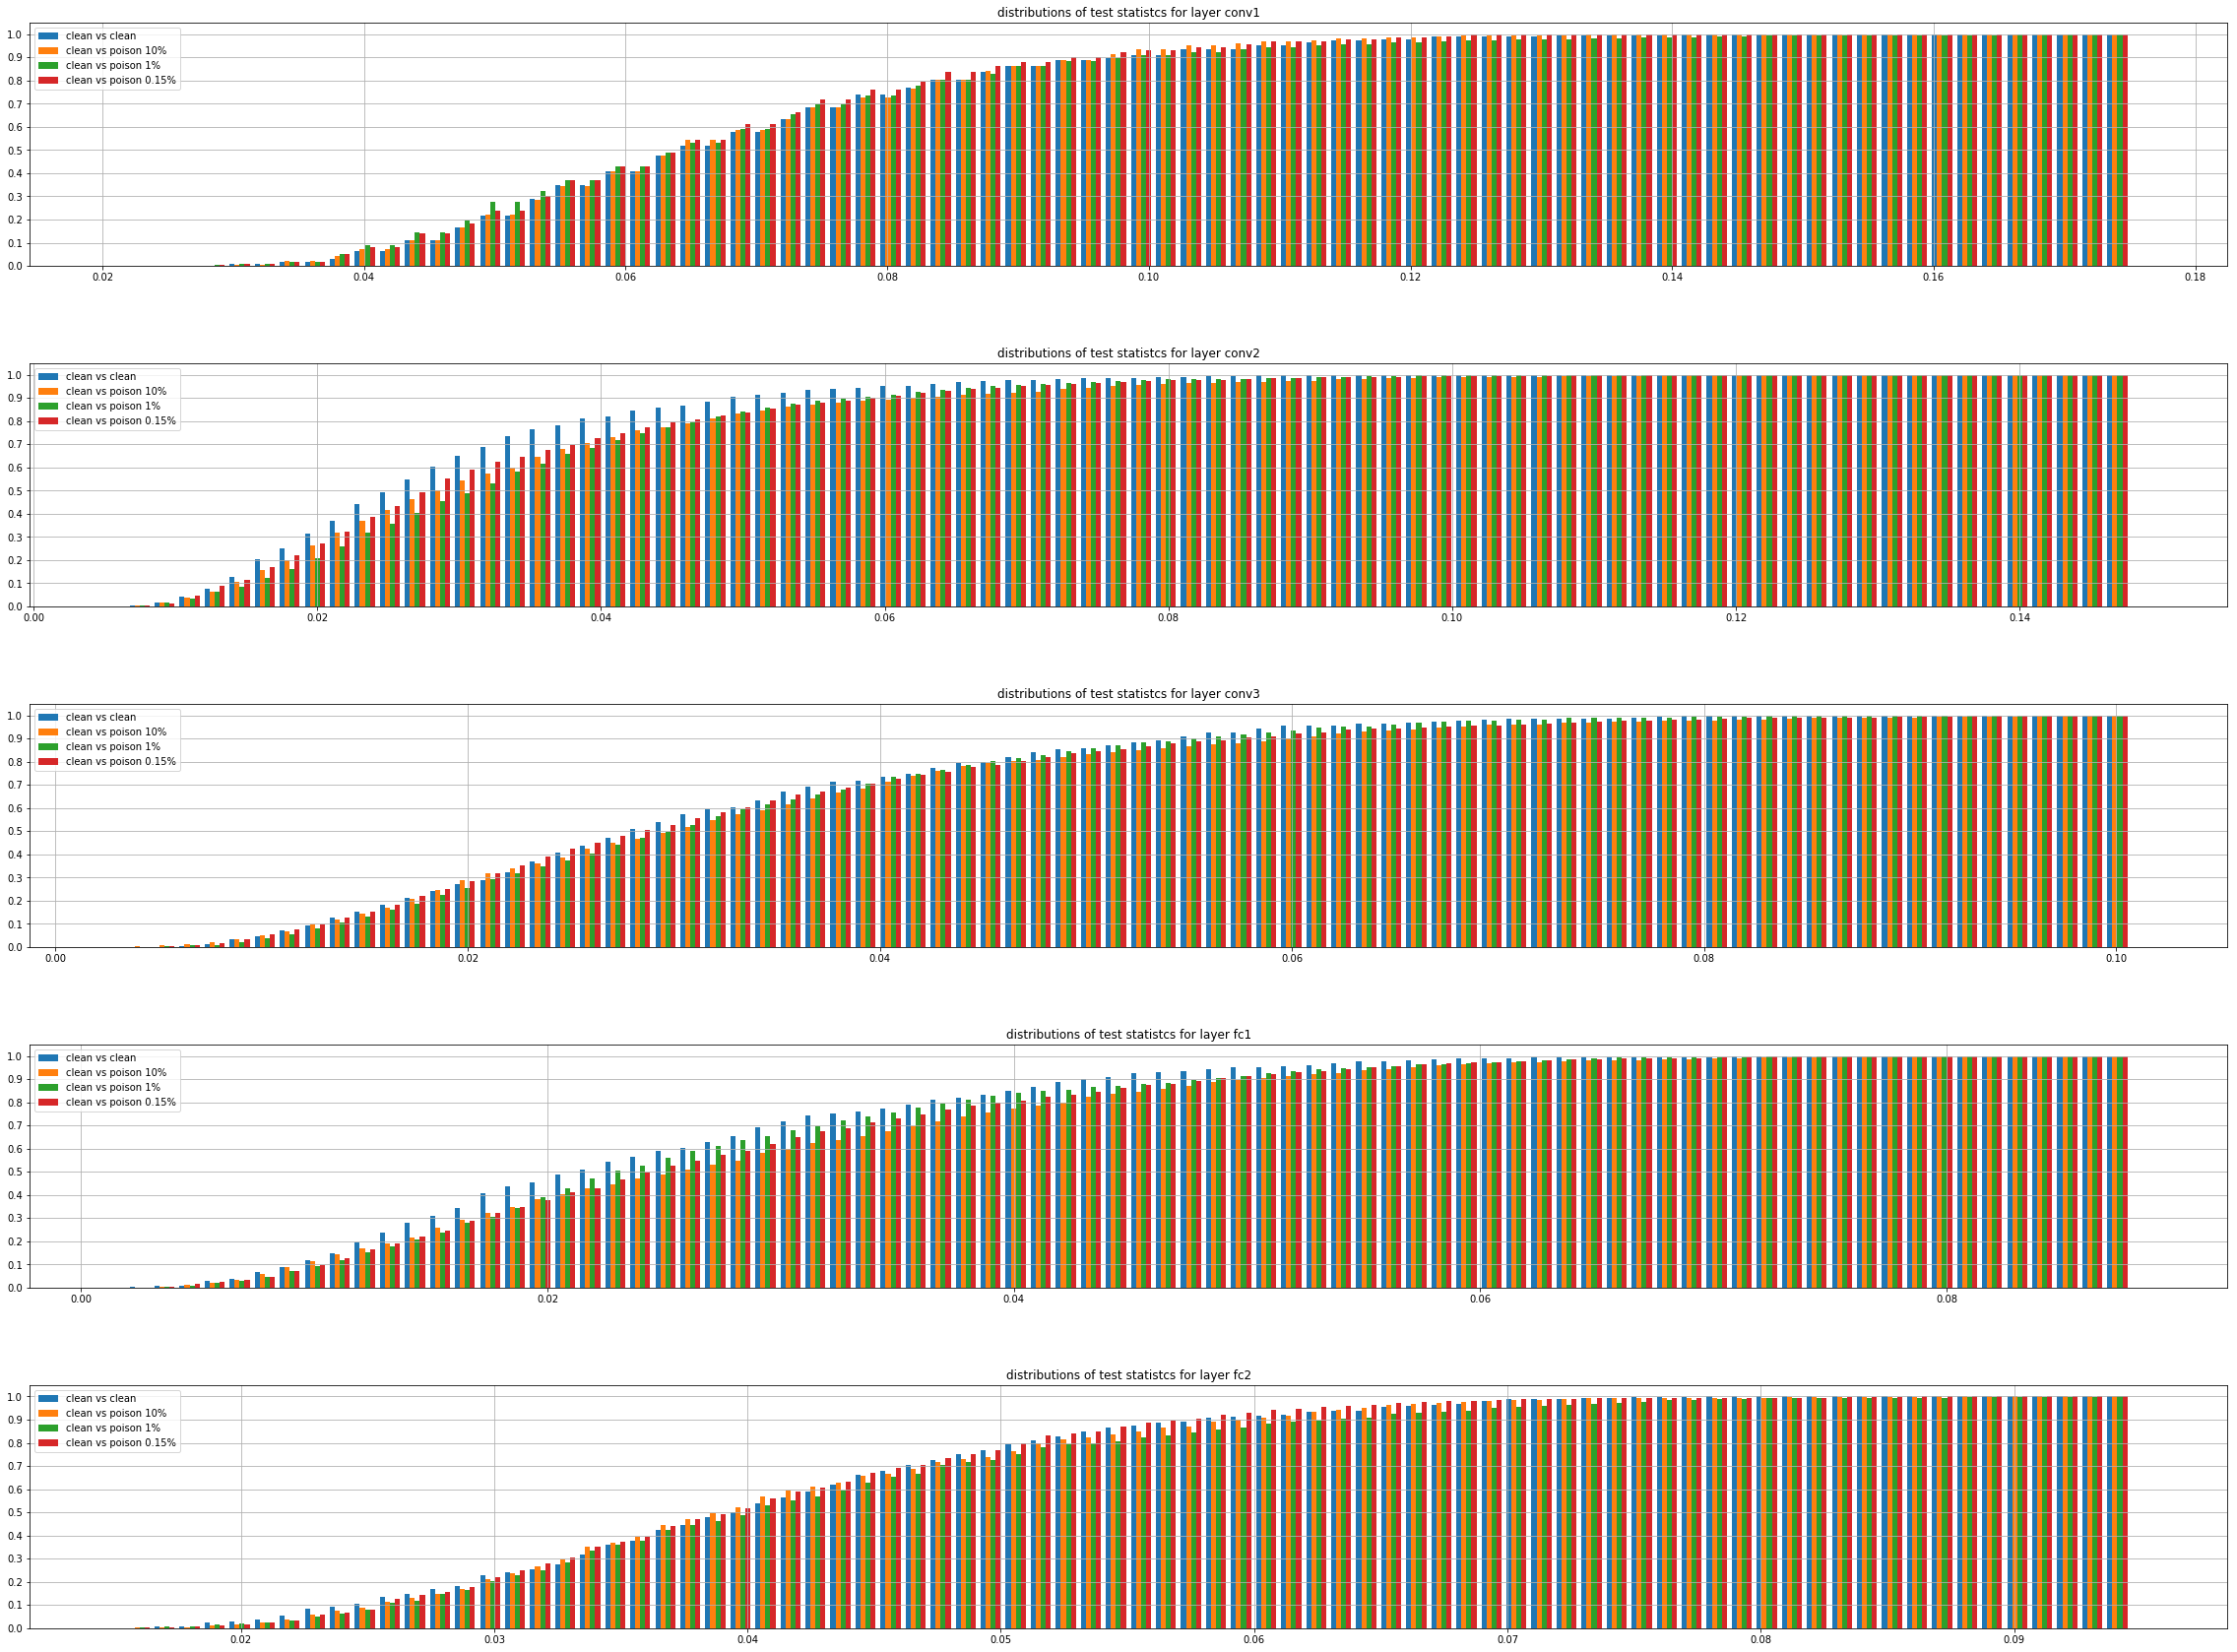

In [67]:
plot_initialize(w=40,h=30)
all_compares_test_stat = {'clean vs clean':clean_vs_clean,
                          'clean vs poison 10%':clean_vs_d_10,
                          'clean vs poison 1%':clean_vs_d_1,
                          'clean vs poison 0.15%':clean_vs_d_0_15,
                         }
plot_test_stats(all_compares_test_stat)

Populating the interactive namespace from numpy and matplotlib


/usr/lib/python3.7/site-packages/ipykernel_launcher.py:136: MatplotlibDeprecationWarning: numpy.arange


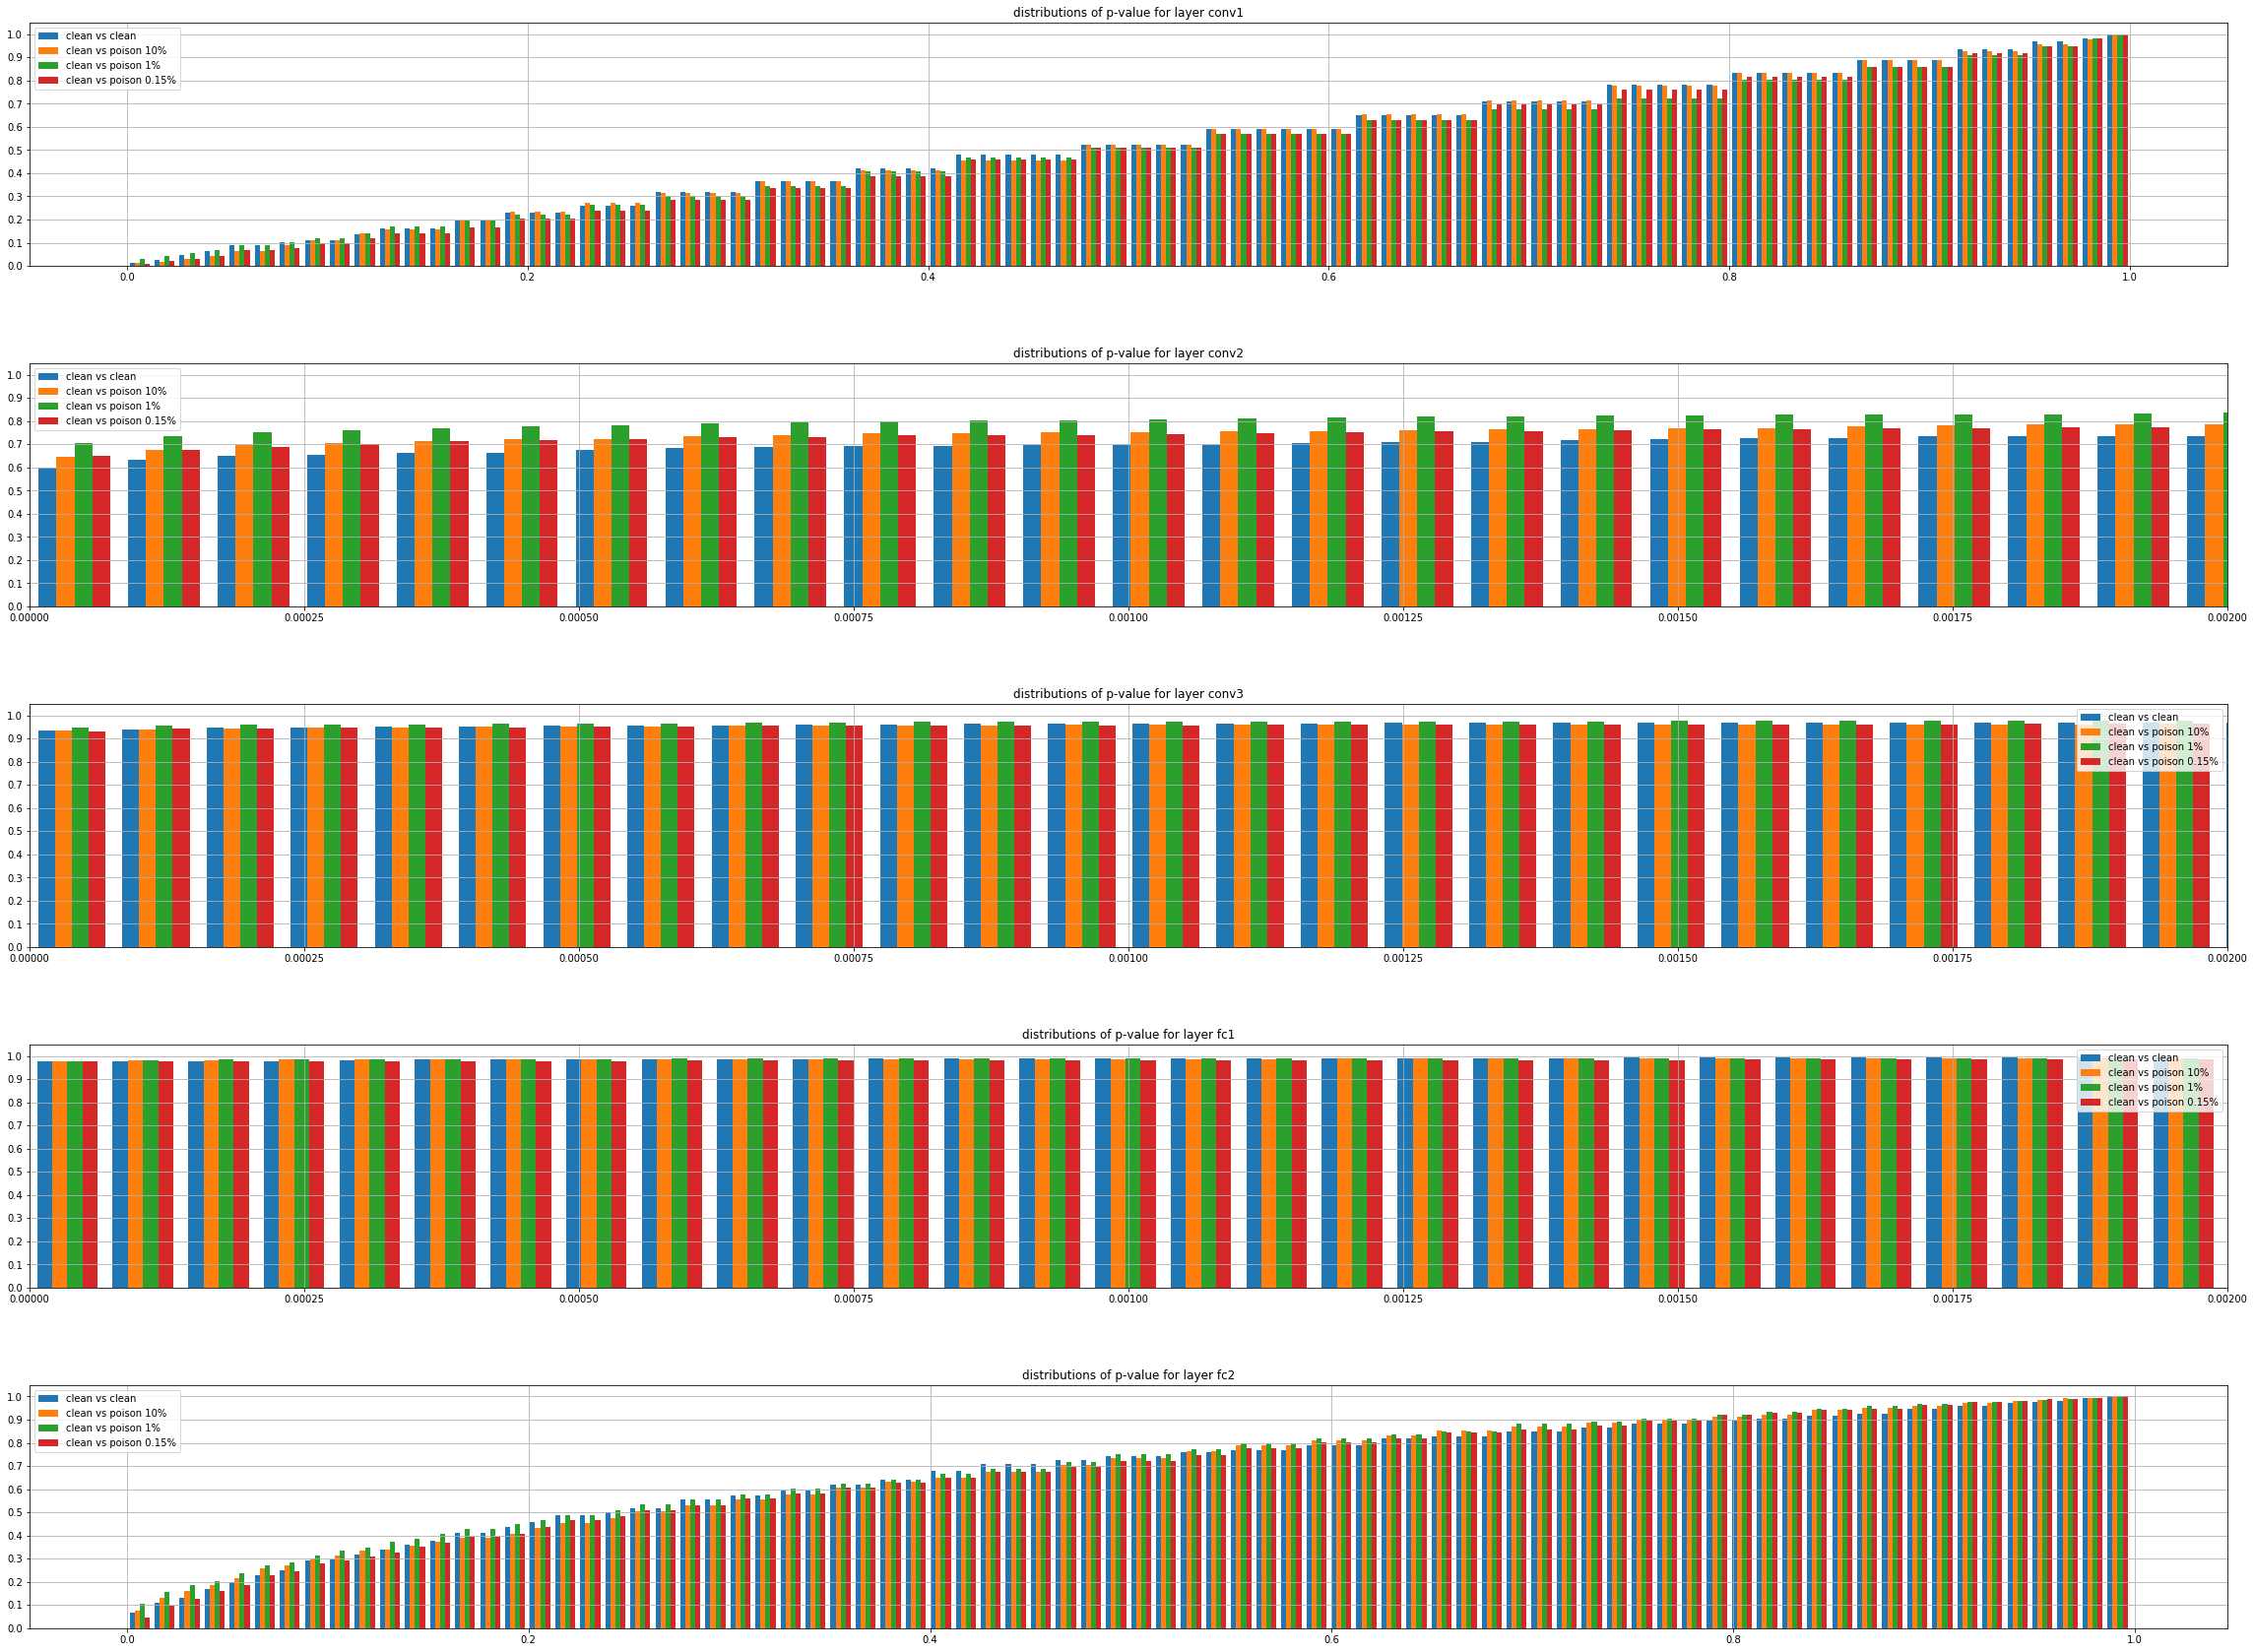

In [41]:
plot_initialize(w=40,h=30)
clean_vs_clean_pv = enumerate_layer_vals(clean_compares,ind=1)
clean_vs_d_10_pv = enumerate_layer_vals(clean_dirt_p_10,ind=1)
clean_vs_d_1_pv = enumerate_layer_vals(clean_dirt_p_1,ind=1)
clean_vs_d_0_15_pv = enumerate_layer_vals(clean_dirt_p_0_15,ind=1)
all_compares_test_stat_pv = {'clean vs clean':clean_vs_clean_pv,
                          'clean vs poison 10%':clean_vs_d_10_pv,
                          'clean vs poison 1%':clean_vs_d_1_pv,
                          'clean vs poison 0.15%':clean_vs_d_0_15_pv,
                         }
plot_test_pv(all_compares_test_stat_pv)

## Kolmogrov Smirnov with Rank Elimination 5000 of paramters if they have more

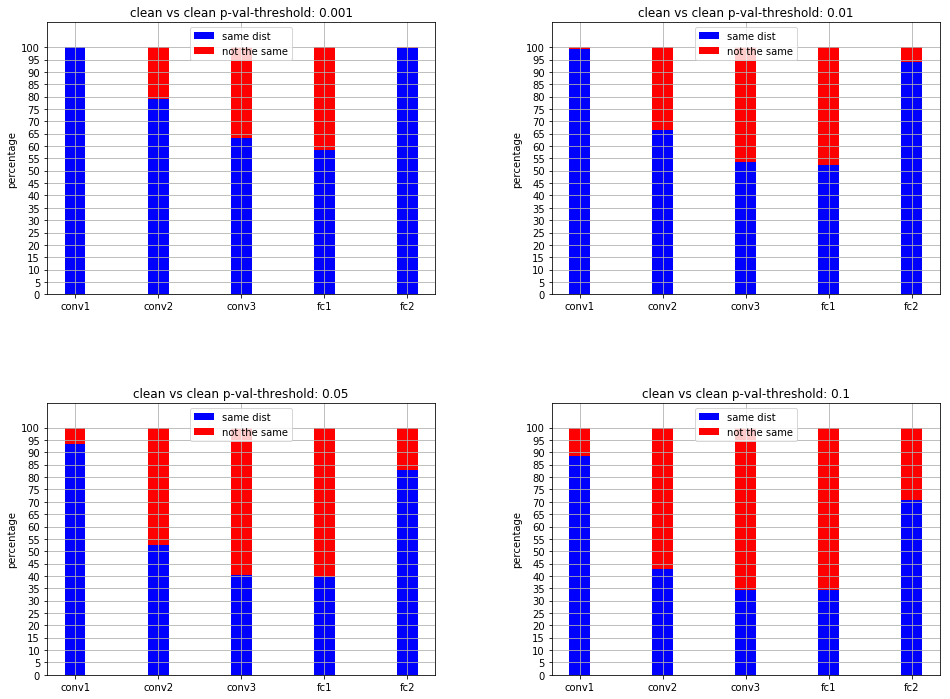

In [491]:
for i,v in enumerate([0.001,0.01,0.05,0.10],1):
  p_val_thresh = v
  clean_compares = clean_by_clean_k_test(ret_logs,fn=two_sample_test,rank_elim=True)
  plot_layers(clean_compares,i,dirty=False)
plt.show()

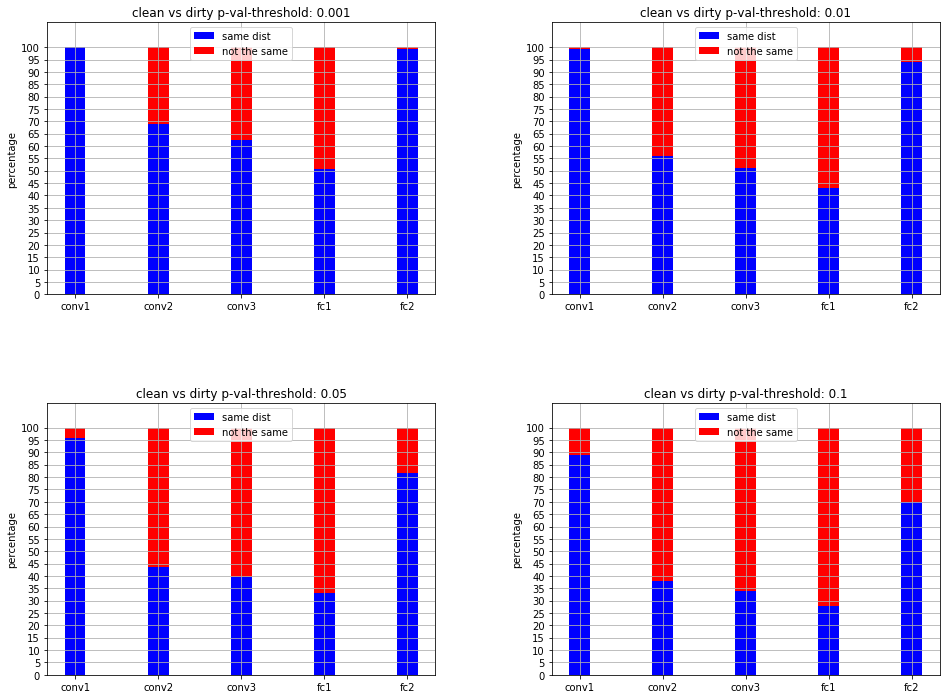

In [492]:
for i,v in enumerate([0.001,0.01,0.05,0.10],1):
  p_val_thresh = v
  compares = run_dirty_ks_test(ret_logs,'poisoned 10% of training, 10% test of target label',
                               fn=two_sample_test,rank_elim=True)
  plot_layers(compares,i,dirty=True)
plt.show()

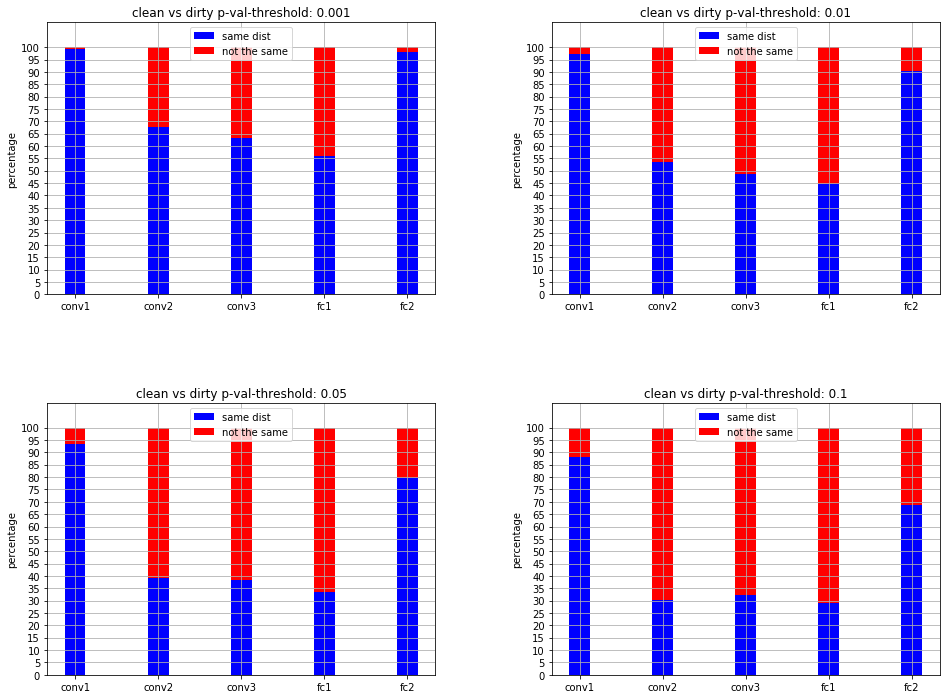

In [493]:
for i,v in enumerate([0.001,0.01,0.05,0.10],1):
  p_val_thresh = v
  compares = run_dirty_ks_test(ret_logs,'poisoned 1% of training, 10% test of target label',
                               fn=two_sample_test,rank_elim=True)
  plot_layers(compares,i,dirty=True)
plt.show()

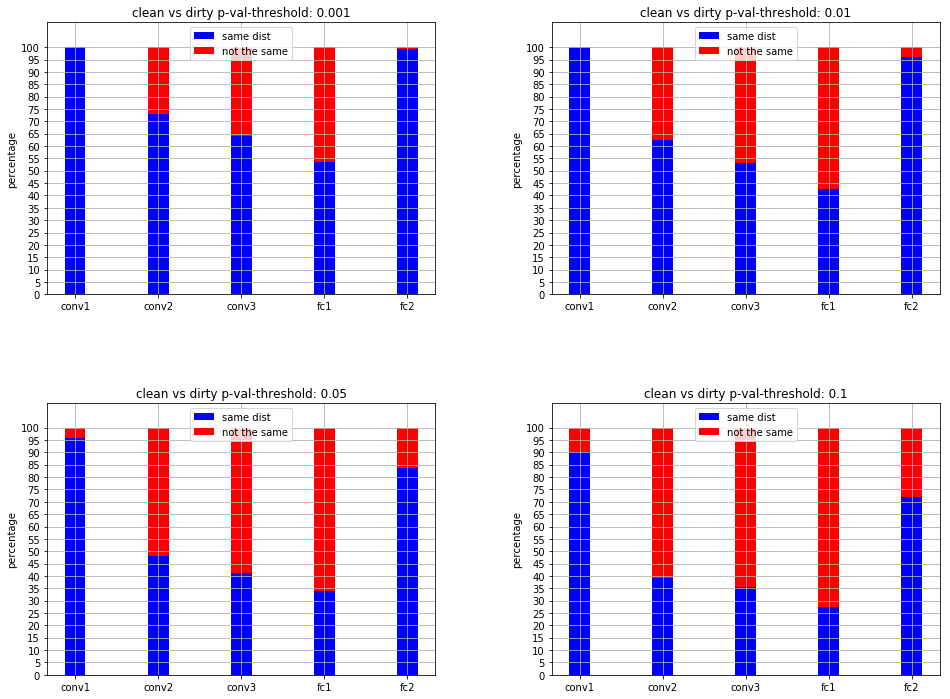

In [494]:
for i,v in enumerate([0.001,0.01,0.05,0.10],1):
  p_val_thresh = v
  compares = run_dirty_ks_test(ret_logs,'poisoned 0.15% of training, 10% test of target label',
                               fn=two_sample_test,rank_elim=True)
  plot_layers(compares,i,dirty=True)
plt.show()

In [501]:
clean_compares = clean_by_clean_k_test(ret_logs,fn=stats.ks_2samp,rank_elim=True)

In [502]:
clean_dirt_p_10 = run_dirty_ks_test(
  ret_logs,'poisoned 10% of training, 10% test of target label',fn=stats.ks_2samp,rank_elim=True)
clean_dirt_p_1 = run_dirty_ks_test(
  ret_logs,'poisoned 1% of training, 10% test of target label',fn=stats.ks_2samp,rank_elim=True)
clean_dirt_p_0_15 = run_dirty_ks_test(
  ret_logs,'poisoned 0.15% of training, 10% test of target label',fn=stats.ks_2samp,rank_elim=True)

In [503]:
clean_vs_clean = enumerate_layer_vals(clean_compares,ind=0)
clean_vs_d_10 = enumerate_layer_vals(clean_dirt_p_10,ind=0)
clean_vs_d_1 = enumerate_layer_vals(clean_dirt_p_1,ind=0)
clean_vs_d_0_15 = enumerate_layer_vals(clean_dirt_p_0_15,ind=0)
all_compares_test_stat = {'clean vs clean':clean_vs_clean,
                          'clean vs poison 10%':clean_vs_d_10,
                          'clean vs poison 1%':clean_vs_d_1,
                          'clean vs poison 0.15%':clean_vs_d_0_15,
                         }

Populating the interactive namespace from numpy and matplotlib


/usr/lib/python3.7/site-packages/ipykernel_launcher.py:198: MatplotlibDeprecationWarning: numpy.arange


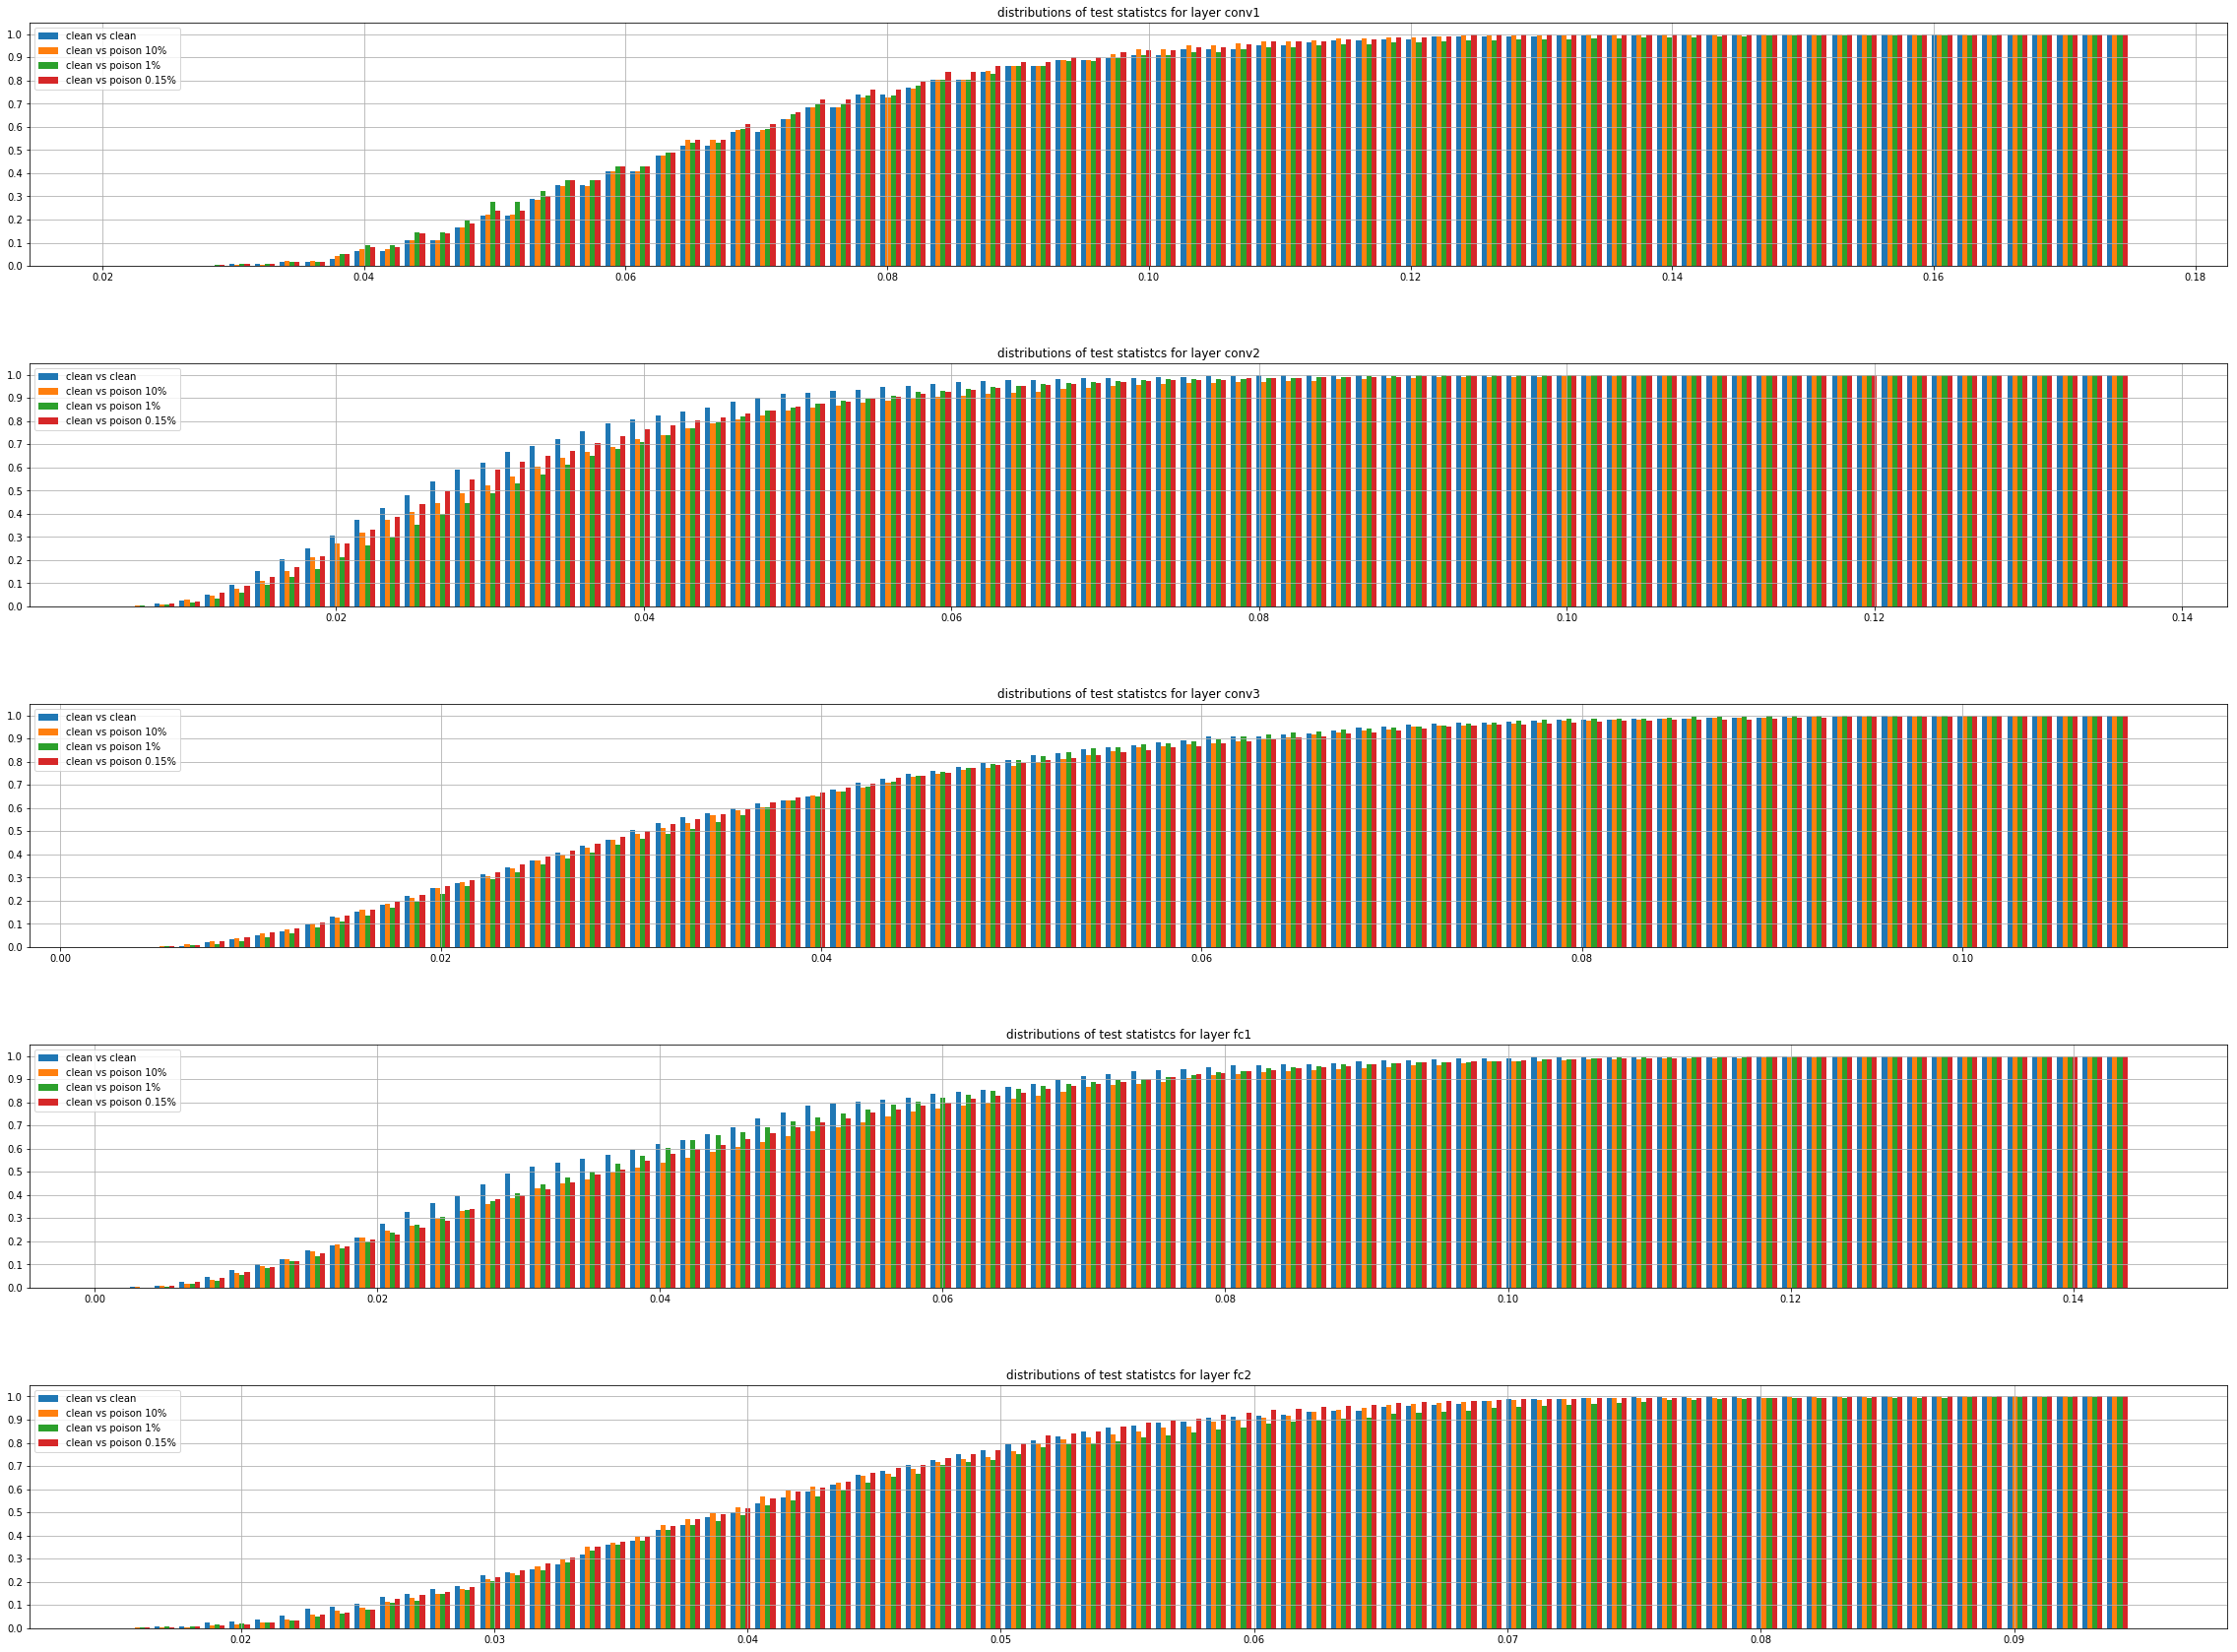

In [504]:
plot_initialize(w=40,h=30)
plot_test_stats(all_compares_test_stat)

Populating the interactive namespace from numpy and matplotlib


/usr/lib/python3.7/site-packages/ipykernel_launcher.py:224: MatplotlibDeprecationWarning: numpy.arange


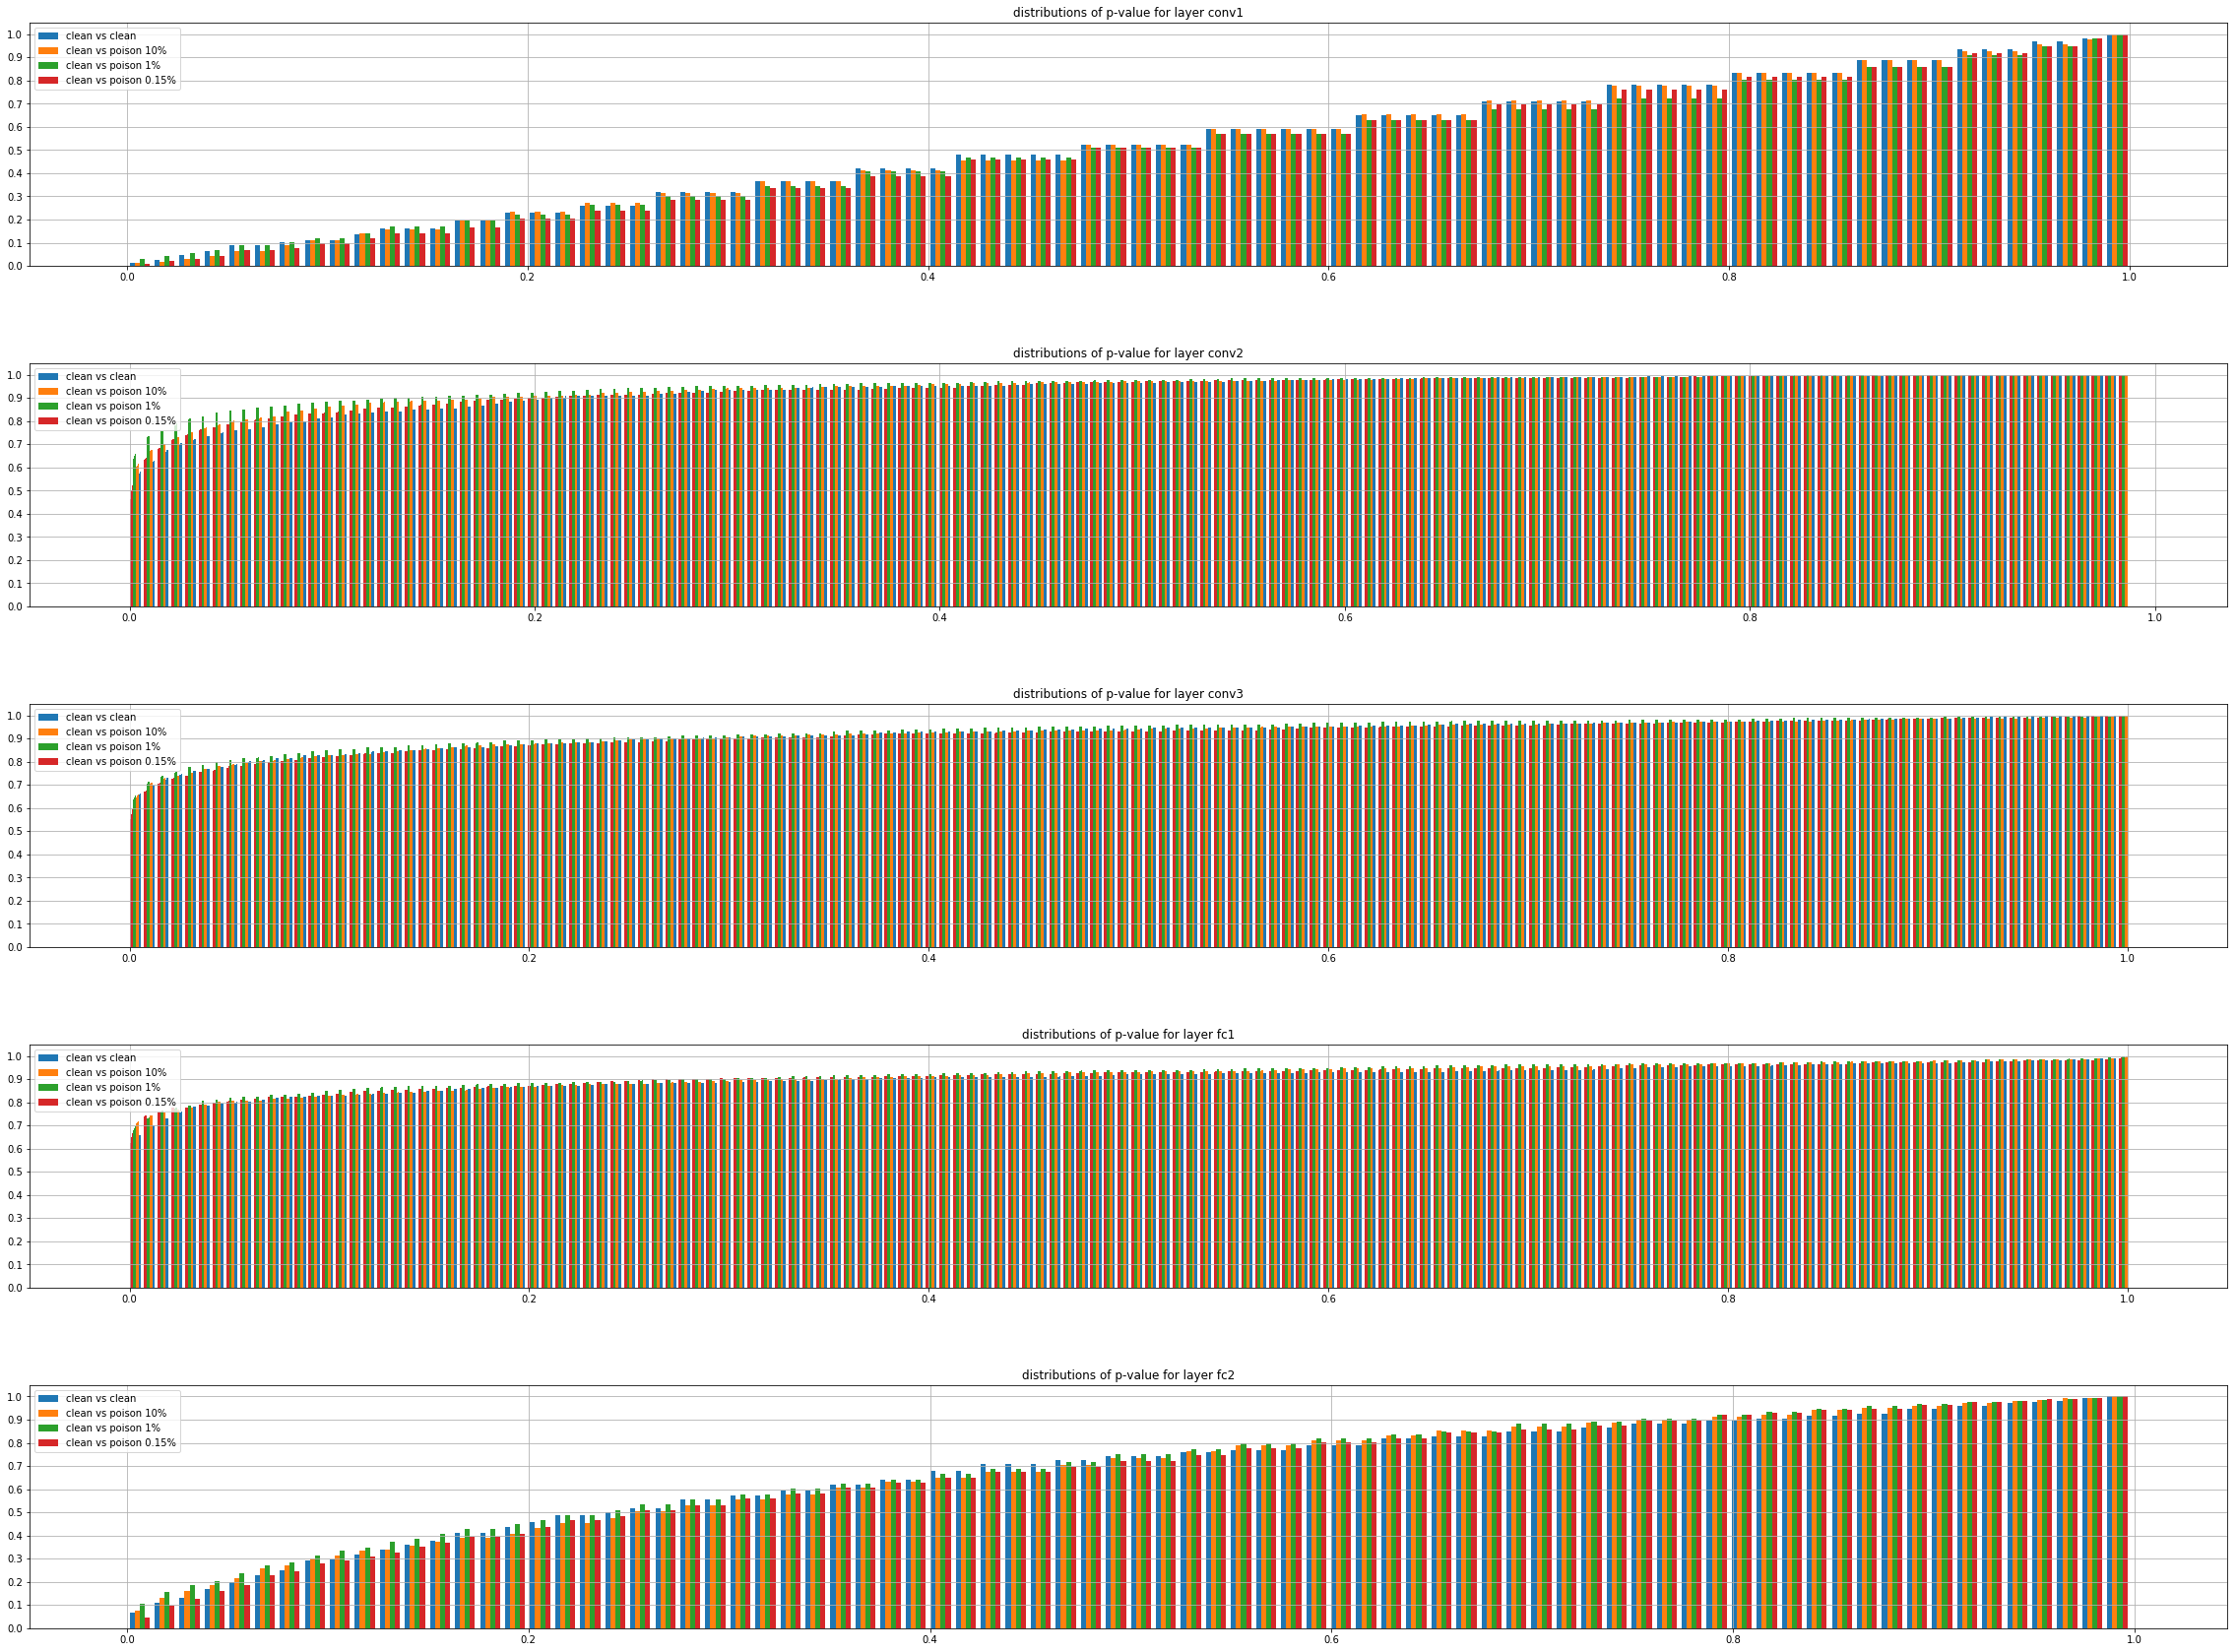

In [505]:
plot_initialize(w=40,h=30)
clean_vs_clean_pv = enumerate_layer_vals(clean_compares,ind=1)
clean_vs_d_10_pv = enumerate_layer_vals(clean_dirt_p_10,ind=1)
clean_vs_d_1_pv = enumerate_layer_vals(clean_dirt_p_1,ind=1)
clean_vs_d_0_15_pv = enumerate_layer_vals(clean_dirt_p_0_15,ind=1)
all_compares_test_stat_pv = {'clean vs clean':clean_vs_clean_pv,
                          'clean vs poison 10%':clean_vs_d_10_pv,
                          'clean vs poison 1%':clean_vs_d_1_pv,
                          'clean vs poison 0.15%':clean_vs_d_0_15_pv,
                         }
plot_test_pv(all_compares_test_stat_pv)

## Vectors are sorted to calculate the angle 5000 of paramters if they have more

In [507]:
degrees_clean_compares = clean_clean_degrees(ret_logs,fn=calculate_angle)
clean_v_l_list = {}
for l in layers_bound.keys():
  clean_v_l_list[l] = []
  for k,v in  degrees_clean_compares.items():
    clean_v_l_list[l].append(v[l]) 

In [508]:
degrees_clean_p_10_compares = poison_clean_degrees(ret_logs,'poisoned 10% of training, 10% test of target label',
                               fn=calculate_angle)
p_10_v_l_list = {}
for l in layers_bound.keys():
  p_10_v_l_list[l] = []
  for k,v in  degrees_clean_p_10_compares.items():
    p_10_v_l_list[l].append(v[l]) 

In [509]:
degrees_clean_p_1_compares = poison_clean_degrees(ret_logs,'poisoned 1% of training, 10% test of target label',
                               fn=calculate_angle)
p_1_v_l_list = {}
for l in layers_bound.keys():
  p_1_v_l_list[l] = []
  for k,v in  degrees_clean_p_1_compares.items():
    p_1_v_l_list[l].append(v[l]) 

In [510]:
degrees_clean_p_0_15_compares = poison_clean_degrees(ret_logs,'poisoned 0.15% of training, 10% test of target label',
                               fn=calculate_angle)
p_0_15_v_l_list = {}
for l in layers_bound.keys():
  p_0_15_v_l_list[l] = []
  for k,v in  degrees_clean_p_0_15_compares.items():
    p_0_15_v_l_list[l].append(v[l]) 

Populating the interactive namespace from numpy and matplotlib


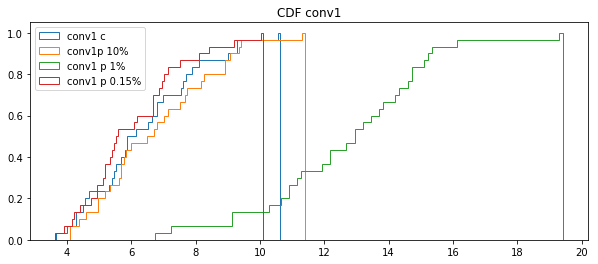

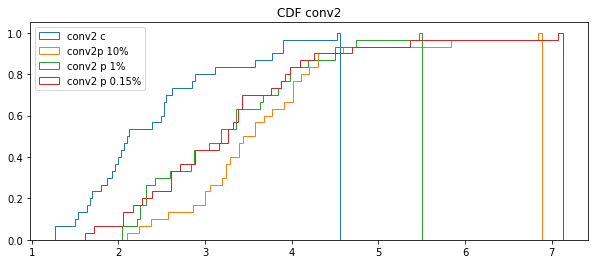

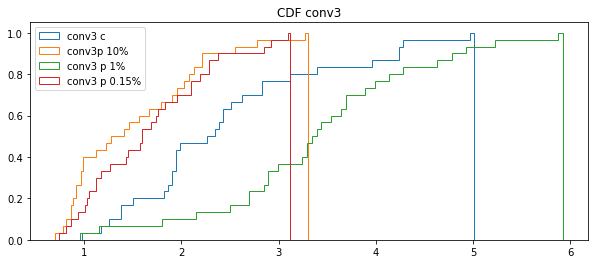

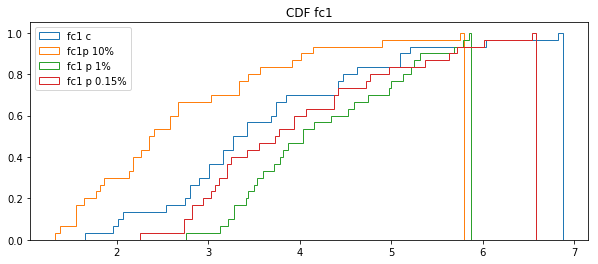

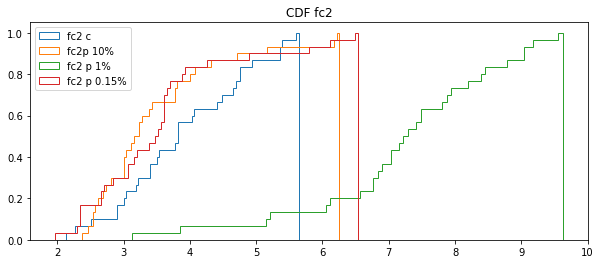

In [511]:
plot_initialize(w=10,h=4)
for l in layers_bound.keys():
  plt.clf()
  plt.title('CDF '+ l)
  plt.hist(clean_v_l_list[l],label=l+str(' c'),bins=100,cumulative=True,density=True,histtype='step')
  plt.hist(p_10_v_l_list[l],label=l+str('p 10%'),bins=100,cumulative=True,density=True,histtype='step')
  plt.hist(p_1_v_l_list[l],label=l+str(' p 1%'),bins=100,cumulative=True,density=True,histtype='step')
  plt.hist(p_0_15_v_l_list[l],label=l+str(' p 0.15%'),bins=100,cumulative=True,density=True,histtype='step')
  plt.legend(loc=2)
  plt.show()

Populating the interactive namespace from numpy and matplotlib


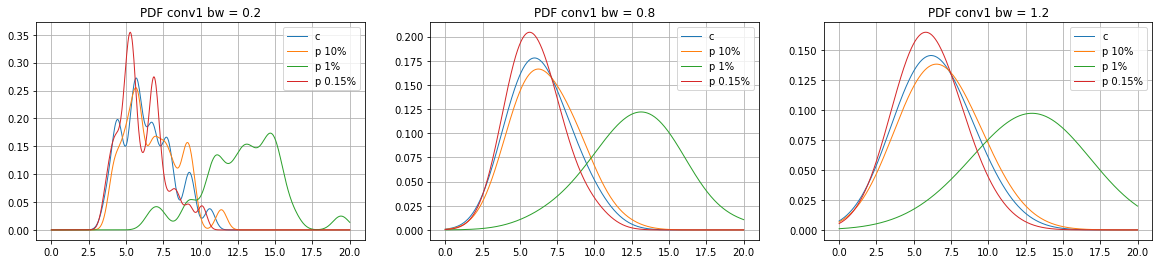

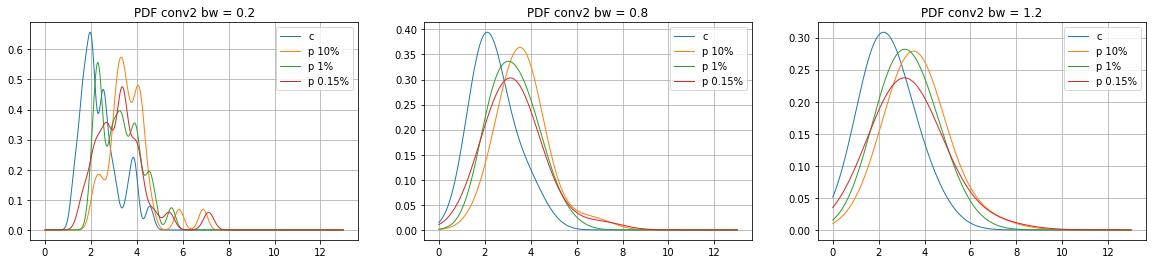

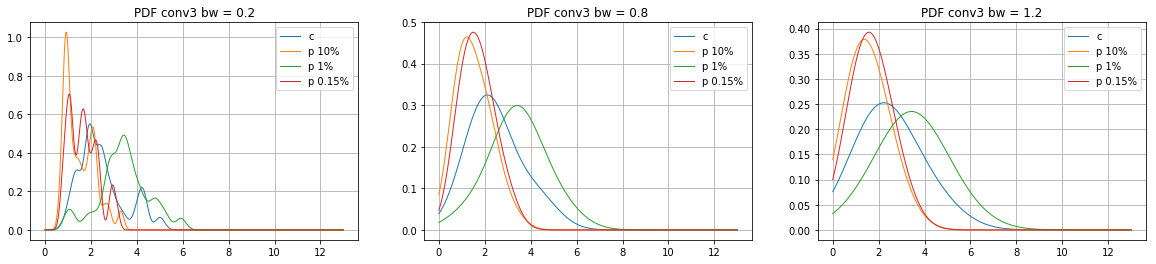

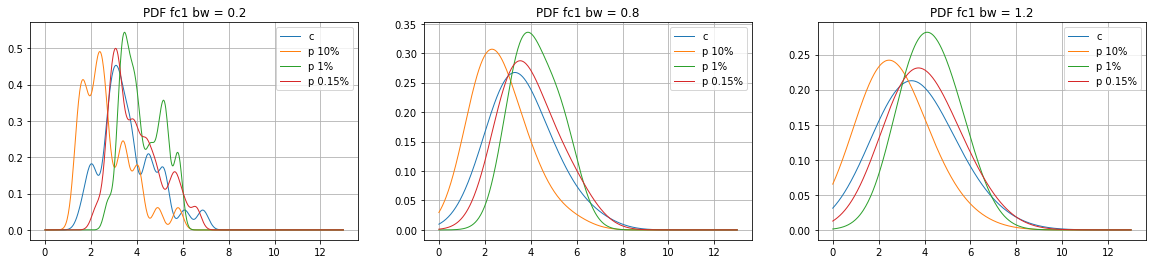

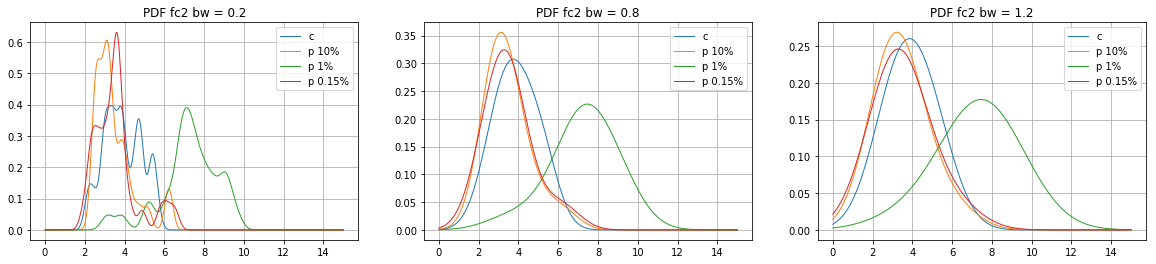

In [512]:
plot_initialize(w=20,h=4)
bw_values =  [0.2,0.8,1.2]
w_range = [(0,20),(0,13),(0,13),(0,13),(0,15)]
#plt.clf()  
for index,l in enumerate(layers_bound.keys()):
  #plt.xlim(0,25)
  kde_c_c = [scipy.stats.gaussian_kde(clean_v_l_list[l],bw_method=bw) for bw in bw_values]
  kde_c_p_10 = [scipy.stats.gaussian_kde(p_10_v_l_list[l],bw_method=bw) for bw in bw_values]
  kde_c_p_1 = [scipy.stats.gaussian_kde(p_1_v_l_list[l],bw_method=bw) for bw in bw_values]
  kde_c_p_0_15 = [scipy.stats.gaussian_kde(p_0_15_v_l_list[l],bw_method=bw) for bw in bw_values]
  for j, bw in enumerate(bw_values):
    plt.subplot(1,len(bw_values),j+1)
    plt.title('PDF '+ l + ' bw = ' + str(bw))
    t_range = np.linspace(w_range[index][0],w_range[index][1],500)
    plt.plot(t_range,kde_c_c[j](t_range),lw=1, label='c')
    
    t_range = np.linspace(w_range[index][0],w_range[index][1],500)
    plt.plot(t_range,kde_c_p_10[j](t_range),lw=1, label='p 10%')
    
    t_range = np.linspace(w_range[index][0],w_range[index][1],500)
    plt.plot(t_range,kde_c_p_1[j](t_range),lw=1, label='p 1%')
    
    t_range = np.linspace(w_range[index][0],w_range[index][1],500)
    plt.plot(t_range,kde_c_p_0_15[j](t_range),lw=1, label='p 0.15%')
    
    plt.legend(loc=0)
    plt.grid()
  plt.show()